# AIA21  - Session06  

# **Create images dataset**

In [1]:
!pip install geocoder osmnx
!pip install matplotlib==3.1.3
!pip install graphviz
!pip install cgraph
!apt install libgraphviz-dev
!pip install pygraphviz 
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 5.9 MB/s 
     |████████████████████████████████| 95 kB 5.7 MB/s 
     |████████████████████████████████| 62 kB 644 kB/s 
     |████████████████████████████████| 6.3 MB 65.7 MB/s 
     |████████████████████████████████| 1.0 MB 56.2 MB/s 
     |████████████████████████████████| 1.0 MB 37.5 MB/s 
     |████████████████████████████████| 11.2 MB 49.8 MB/s 
     |████████████████████████████████| 16.7 MB 48.4 MB/s 
     |████████████████████████████████| 930 kB 26.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for cgraph: filename=cGraph-0.1-cp37-cp37m-linux_x86_64.whl size=19560 sha256=069660fb4dc24e2859a77190588ae1a1e3a56a1a8731b2eba6dc36f0765427ec
  Stored in directory: /root/.cache/pip/wheels/b6/02/29/2ef9393645e001f76ed0238ea62f8931e98c09b28b21506cb3
Successfully built cgraph
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
import urllib
%matplotlib inline 
import matplotlib.pyplot as plt
import geocoder
from tqdm import tqdm
import pandas as pd
import numpy as np
import shapely
import geopandas as gpd
import copy
import geocoder
import time

In [3]:
from google.colab import drive

mount_point = '/content/gdrive'
drive.mount(mount_point)

Mounted at /content/gdrive


In [4]:
tokyoGrid = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/koshigayaGridCentroids.csv')

In [5]:
tokyoGrid.head()

,ID,lng,lat
0,1,139.585,35.735
1,2,139.585,35.745
2,3,139.585,35.755
3,4,139.585,35.765
4,5,139.585,35.775


**Generate graph images using lat and long with a distance**



In [ ]:


min_nodes=10 #minimum number of nodes in the graph

for i in tqdm(range(len(tokyoGrid))):
  try:
    place=tokyoGrid['ID'][i]
    geocoder_json=geocoder.osm(place,maxRows=1)
    lat1=geocoder_json.json['lat']
    lng1=geocoder_json.json['lng']
    point=(lat1,lng1)
    dist=1000
    g=ox.graph_from_point(point,dist,network_type='all',simplify=True)
    print(g.number_of_nodes())
    if g.number_of_nodes()>min_nodes:
      nodes, edges = ox.graph_to_gdfs(g)
      #plot
      fig, ax = plt.subplots(figsize=(10,10))
      edges.plot(ax=ax, linewidth=1, edgecolor='black')
      #nodes.plot(ax=ax, color='red', markersize=8)
      plt.axis('off')
      plt.savefig(r"/content/gdrive/MyDrive/ColabNotebooks/GeometricOptimization/generative_cities/data/imgKoshigaya/img" + str(i) +'.png')  #add your own path
      print('done')
    else:
      print('small graph')

  except:
    print('except')
    continue

  0%|          | 1/1505 [01:05<27:11:31, 65.09s/it]

3
small graph
213


  0%|          | 2/1505 [02:12<27:48:12, 66.59s/it]

done
71


  0%|          | 3/1505 [03:18<27:37:13, 66.20s/it]

done


  0%|          | 4/1505 [04:22<27:11:13, 65.21s/it]

4
small graph


  0%|          | 5/1505 [05:31<27:44:49, 66.59s/it]

9
small graph


  0%|          | 6/1505 [06:36<27:32:42, 66.15s/it]

17
done
20


  0%|          | 7/1505 [07:41<27:22:46, 65.80s/it]

done
194


  1%|          | 8/1505 [08:46<27:18:11, 65.66s/it]

done


  1%|          | 9/1505 [09:50<26:59:12, 64.94s/it]

10
small graph


  1%|          | 10/1505 [10:55<26:58:33, 64.96s/it]

32
done


  1%|          | 11/1505 [11:59<26:53:35, 64.80s/it]

32
done
95


  1%|          | 12/1505 [13:03<26:47:17, 64.59s/it]

done
652


  1%|          | 13/1505 [14:08<26:50:17, 64.76s/it]

done


  1%|          | 14/1505 [15:12<26:38:38, 64.33s/it]

24
done


  1%|          | 15/1505 [16:17<26:41:14, 64.48s/it]

42
done
276


  1%|          | 16/1505 [17:22<26:47:58, 64.79s/it]

done
164


  1%|          | 17/1505 [18:28<26:55:46, 65.15s/it]

done


  1%|          | 18/1505 [19:31<26:34:48, 64.35s/it]

except


  1%|▏         | 19/1505 [20:34<26:25:50, 64.03s/it]

27
done


  1%|▏         | 20/1505 [21:37<26:14:26, 63.61s/it]

except


  1%|▏         | 21/1505 [22:40<26:14:32, 63.66s/it]

26
done
193


  1%|▏         | 22/1505 [23:45<26:17:20, 63.82s/it]

done


  2%|▏         | 23/1505 [24:48<26:13:59, 63.72s/it]

65
done


  2%|▏         | 24/1505 [25:53<26:24:41, 64.20s/it]

30
done


  2%|▏         | 25/1505 [26:57<26:21:53, 64.13s/it]

44
done


  2%|▏         | 26/1505 [28:01<26:20:49, 64.13s/it]

12
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 27/1505 [29:05<26:16:04, 63.98s/it]

14
done
106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 28/1505 [30:09<26:11:40, 63.85s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 29/1505 [31:12<26:08:57, 63.78s/it]

39
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 30/1505 [32:18<26:25:52, 64.51s/it]

21
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 31/1505 [33:21<26:10:56, 63.95s/it]

13
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 32/1505 [34:25<26:07:45, 63.86s/it]

20
done
1224


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 33/1505 [35:36<27:02:08, 66.12s/it]

done
484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 34/1505 [36:45<27:19:46, 66.88s/it]

done


  2%|▏         | 35/1505 [37:48<26:51:51, 65.79s/it]

6
small graph


  2%|▏         | 36/1505 [38:51<26:27:42, 64.85s/it]

4
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  2%|▏         | 37/1505 [39:55<26:20:12, 64.59s/it]

16
done
857


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 38/1505 [41:00<26:27:04, 64.91s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 39/1505 [42:03<26:11:10, 64.30s/it]

50
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 40/1505 [43:06<26:00:35, 63.92s/it]

18
done
76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 41/1505 [44:09<25:50:29, 63.54s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 42/1505 [45:12<25:43:50, 63.32s/it]

21
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 43/1505 [46:15<25:41:18, 63.25s/it]

74
done
138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 44/1505 [47:19<25:48:56, 63.61s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 45/1505 [48:23<25:48:46, 63.65s/it]

11
done


  3%|▎         | 46/1505 [49:26<25:44:23, 63.51s/it]

10
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 47/1505 [50:31<25:51:03, 63.83s/it]

51
done
78


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 48/1505 [51:35<25:55:23, 64.05s/it]

done
75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 49/1505 [52:39<25:50:57, 63.91s/it]

done
185


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 50/1505 [53:43<25:48:21, 63.85s/it]

done
437


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  3%|▎         | 51/1505 [54:52<26:28:55, 65.57s/it]

done


  3%|▎         | 52/1505 [55:55<26:04:29, 64.60s/it]

5
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▎         | 53/1505 [56:58<25:51:54, 64.13s/it]

28
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▎         | 54/1505 [58:00<25:38:55, 63.64s/it]

12
done
75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▎         | 55/1505 [59:03<25:33:53, 63.47s/it]

done
58


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▎         | 56/1505 [1:00:06<25:29:54, 63.35s/it]

done
48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 57/1505 [1:01:09<25:24:04, 63.15s/it]

done


  4%|▍         | 58/1505 [1:02:12<25:20:19, 63.04s/it]

2
small graph
165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 59/1505 [1:03:15<25:24:41, 63.27s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 60/1505 [1:04:22<25:44:39, 64.14s/it]

18
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 61/1505 [1:05:25<25:35:46, 63.81s/it]

24
done


  4%|▍         | 62/1505 [1:06:28<25:29:19, 63.59s/it]

7
small graph
1312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 63/1505 [1:07:40<26:27:35, 66.06s/it]

done


  4%|▍         | 64/1505 [1:08:44<26:17:23, 65.68s/it]

9
small graph
73


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 65/1505 [1:09:48<26:02:16, 65.09s/it]

done
106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 66/1505 [1:10:53<25:57:46, 64.95s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  4%|▍         | 67/1505 [1:11:56<25:46:50, 64.54s/it]

48
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 68/1505 [1:13:00<25:39:31, 64.28s/it]

34
done


  5%|▍         | 69/1505 [1:14:02<25:25:39, 63.75s/it]

except
145


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 70/1505 [1:15:07<25:28:31, 63.91s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 71/1505 [1:16:10<25:22:26, 63.70s/it]

44
done
168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 72/1505 [1:17:14<25:25:11, 63.86s/it]

done


  5%|▍         | 73/1505 [1:18:17<25:18:51, 63.64s/it]

5
small graph
176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 74/1505 [1:19:22<25:25:43, 63.97s/it]

done
1900


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▍         | 75/1505 [1:20:34<26:24:32, 66.48s/it]

done
52


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 76/1505 [1:21:37<25:57:04, 65.38s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 77/1505 [1:22:40<25:36:49, 64.57s/it]

15
done
112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 78/1505 [1:23:45<25:42:23, 64.85s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 79/1505 [1:24:49<25:33:13, 64.51s/it]

68
done


  5%|▌         | 80/1505 [1:25:52<25:23:32, 64.15s/it]

10
small graph
92


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 81/1505 [1:26:56<25:17:40, 63.95s/it]

done
79


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  5%|▌         | 82/1505 [1:27:59<25:12:01, 63.75s/it]

done


  6%|▌         | 83/1505 [1:29:02<25:06:32, 63.57s/it]

7
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 84/1505 [1:30:06<25:07:40, 63.66s/it]

42
done
473


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 85/1505 [1:31:21<26:23:44, 66.92s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 86/1505 [1:32:25<26:00:07, 65.97s/it]

35
done
70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 87/1505 [1:33:29<25:47:31, 65.48s/it]

done
127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 88/1505 [1:34:33<25:39:24, 65.18s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 89/1505 [1:35:36<25:20:33, 64.43s/it]

43
done
133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 90/1505 [1:36:40<25:17:24, 64.34s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 91/1505 [1:37:43<25:07:56, 63.99s/it]

48
done
692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 92/1505 [1:38:55<26:00:39, 66.27s/it]

done
1255


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 93/1505 [1:40:05<26:23:07, 67.27s/it]

done
2389


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▌         | 94/1505 [1:41:20<27:19:29, 69.72s/it]

done
335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▋         | 95/1505 [1:42:26<26:55:50, 68.76s/it]

done
115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▋         | 96/1505 [1:43:30<26:20:49, 67.32s/it]

done
166


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  6%|▋         | 97/1505 [1:44:34<25:54:24, 66.24s/it]

done
155


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 98/1505 [1:45:38<25:36:49, 65.54s/it]

done
206


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 99/1505 [1:46:46<25:56:22, 66.42s/it]

done
259


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 100/1505 [1:47:51<25:38:59, 65.72s/it]

done


  7%|▋         | 101/1505 [1:48:53<25:16:50, 64.82s/it]

except
1552


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 102/1505 [1:50:00<25:30:39, 65.46s/it]

done
1035


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 103/1505 [1:51:08<25:43:28, 66.05s/it]

done
1093


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 104/1505 [1:52:14<25:44:36, 66.15s/it]

done
557


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 105/1505 [1:53:20<25:38:54, 65.95s/it]

done
1778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 106/1505 [1:54:27<25:48:20, 66.41s/it]

done
1042


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 107/1505 [1:55:33<25:42:45, 66.21s/it]

done
411


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 108/1505 [1:56:39<25:38:49, 66.09s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 109/1505 [1:57:41<25:12:48, 65.02s/it]

12
done
181


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 110/1505 [1:58:48<25:22:46, 65.50s/it]

done
584


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 111/1505 [1:59:53<25:23:05, 65.56s/it]

done
865


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  7%|▋         | 112/1505 [2:01:00<25:27:12, 65.78s/it]

done
628


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 113/1505 [2:02:11<26:02:41, 67.36s/it]

done
659


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 114/1505 [2:03:16<25:43:26, 66.58s/it]

done
103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 115/1505 [2:04:20<25:26:44, 65.90s/it]

done
289


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 116/1505 [2:05:25<25:17:39, 65.56s/it]

done
284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 117/1505 [2:06:29<25:05:12, 65.07s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 118/1505 [2:07:32<24:52:19, 64.56s/it]

37
done
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 119/1505 [2:08:36<24:45:13, 64.30s/it]

done
419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 120/1505 [2:09:41<24:50:14, 64.56s/it]

done
130


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 121/1505 [2:10:45<24:43:47, 64.33s/it]

done
875


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 122/1505 [2:11:51<24:58:12, 65.00s/it]

done
3089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 123/1505 [2:13:06<26:02:36, 67.84s/it]

done
385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 124/1505 [2:14:10<25:39:06, 66.87s/it]

done
1709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 125/1505 [2:15:35<27:41:53, 72.26s/it]

done
205


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 126/1505 [2:16:38<26:38:10, 69.54s/it]

done
202


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  8%|▊         | 127/1505 [2:17:42<26:00:45, 67.96s/it]

done
430


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▊         | 128/1505 [2:18:47<25:35:38, 66.91s/it]

done
335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▊         | 129/1505 [2:19:52<25:22:04, 66.37s/it]

done
4522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▊         | 130/1505 [2:21:11<26:45:57, 70.08s/it]

done
315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▊         | 131/1505 [2:22:16<26:09:40, 68.55s/it]

done
168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 132/1505 [2:23:20<25:41:15, 67.35s/it]

done
1589


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 133/1505 [2:24:36<26:36:35, 69.82s/it]

done
191


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 134/1505 [2:25:40<25:56:36, 68.12s/it]

done


  9%|▉         | 135/1505 [2:26:42<25:15:42, 66.38s/it]

8
small graph
331


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 136/1505 [2:27:56<26:01:47, 68.45s/it]

done
146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 137/1505 [2:28:59<25:28:32, 67.04s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 138/1505 [2:30:02<24:53:50, 65.57s/it]

14
done


  9%|▉         | 139/1505 [2:31:08<25:01:45, 65.96s/it]

5
small graph
728


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 140/1505 [2:32:13<24:54:14, 65.68s/it]

done
151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 141/1505 [2:33:17<24:38:37, 65.04s/it]

done
420


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  9%|▉         | 142/1505 [2:34:21<24:31:38, 64.78s/it]

done
1811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 143/1505 [2:35:33<25:15:08, 66.75s/it]

done
372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 144/1505 [2:36:38<25:03:24, 66.28s/it]

done
288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 145/1505 [2:37:48<25:29:21, 67.47s/it]

done
219


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 146/1505 [2:38:52<25:05:17, 66.46s/it]

done
2819


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 147/1505 [2:40:05<25:51:30, 68.55s/it]

done
335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 148/1505 [2:41:09<25:15:11, 66.99s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 149/1505 [2:42:12<24:46:21, 65.77s/it]

68
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|▉         | 150/1505 [2:43:15<24:29:23, 65.07s/it]

18
done
2261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 151/1505 [2:44:25<24:59:39, 66.45s/it]

done
93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 152/1505 [2:45:30<24:50:53, 66.11s/it]

done
1083


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 153/1505 [2:46:37<24:55:05, 66.35s/it]

done
146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 154/1505 [2:47:43<24:52:16, 66.27s/it]

done
153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 155/1505 [2:48:49<24:50:53, 66.26s/it]

done
91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 156/1505 [2:49:54<24:36:18, 65.66s/it]

done
1331


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 157/1505 [2:51:04<25:08:27, 67.14s/it]

done
71


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 10%|█         | 158/1505 [2:52:09<24:48:29, 66.30s/it]

done
1280


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 159/1505 [2:53:18<25:09:56, 67.31s/it]

done
144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 160/1505 [2:54:23<24:48:50, 66.42s/it]

done
2710


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 161/1505 [2:55:43<26:20:18, 70.55s/it]

done
174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 162/1505 [2:56:47<25:39:45, 68.79s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 163/1505 [2:57:51<25:00:57, 67.11s/it]

35
done
103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 164/1505 [2:58:55<24:40:02, 66.22s/it]

done
1852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 165/1505 [3:00:06<25:10:19, 67.63s/it]

done
40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 166/1505 [3:01:10<24:46:10, 66.59s/it]

done
2395


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 167/1505 [3:02:18<24:55:27, 67.06s/it]

done
39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 168/1505 [3:03:22<24:30:32, 65.99s/it]

done
390


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█         | 169/1505 [3:04:30<24:43:43, 66.63s/it]

done
2399


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█▏        | 170/1505 [3:05:51<26:20:16, 71.02s/it]

done
295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█▏        | 171/1505 [3:06:55<25:33:36, 68.98s/it]

done
2700


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█▏        | 172/1505 [3:08:12<26:22:11, 71.22s/it]

done
1528


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 11%|█▏        | 173/1505 [3:09:20<26:03:07, 70.41s/it]

done
112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 174/1505 [3:10:24<25:15:17, 68.31s/it]

done
369


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 175/1505 [3:11:29<24:57:30, 67.56s/it]

done
592


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 176/1505 [3:12:38<25:03:17, 67.87s/it]

done


 12%|█▏        | 177/1505 [3:13:40<24:25:34, 66.22s/it]

7
small graph
515


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 178/1505 [3:14:44<24:07:11, 65.43s/it]

done


 12%|█▏        | 179/1505 [3:15:49<24:00:53, 65.20s/it]

5
small graph


 12%|█▏        | 180/1505 [3:16:51<23:43:48, 64.47s/it]

6
small graph


 12%|█▏        | 181/1505 [3:17:53<23:26:46, 63.75s/it]

3
small graph
98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 182/1505 [3:18:58<23:29:10, 63.91s/it]

done
322


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 183/1505 [3:20:03<23:34:44, 64.21s/it]

done
78


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 184/1505 [3:21:06<23:30:17, 64.06s/it]

done
759


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 185/1505 [3:22:11<23:36:29, 64.39s/it]

done
1577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 186/1505 [3:23:19<23:55:40, 65.31s/it]

done
644


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 187/1505 [3:24:27<24:10:56, 66.05s/it]

done
168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 12%|█▏        | 188/1505 [3:25:32<24:03:34, 65.77s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 189/1505 [3:26:41<24:26:14, 66.85s/it]

53
done
567


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 190/1505 [3:27:46<24:11:43, 66.24s/it]

done
64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 191/1505 [3:28:50<23:54:58, 65.52s/it]

done
253


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 192/1505 [3:29:54<23:44:40, 65.10s/it]

done
236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 193/1505 [3:30:58<23:34:43, 64.70s/it]

done
200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 194/1505 [3:32:02<23:32:57, 64.67s/it]

done
572


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 195/1505 [3:33:10<23:53:11, 65.64s/it]

done
192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 196/1505 [3:34:16<23:50:12, 65.56s/it]

done
115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 197/1505 [3:35:20<23:38:25, 65.07s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 198/1505 [3:36:26<23:43:44, 65.36s/it]

49
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 199/1505 [3:37:30<23:33:55, 64.96s/it]

55
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 200/1505 [3:38:34<23:29:21, 64.80s/it]

70
done
238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 201/1505 [3:39:40<23:33:21, 65.03s/it]

done
403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 202/1505 [3:40:44<23:30:22, 64.94s/it]

done
287


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 13%|█▎        | 203/1505 [3:41:52<23:44:06, 65.63s/it]

done
272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▎        | 204/1505 [3:42:55<23:27:13, 64.90s/it]

done
1489


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▎        | 205/1505 [3:44:01<23:38:13, 65.46s/it]

done
78


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▎        | 206/1505 [3:45:07<23:37:39, 65.48s/it]

done


 14%|█▍        | 207/1505 [3:46:10<23:21:16, 64.77s/it]

5
small graph
250


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 208/1505 [3:47:14<23:14:57, 64.53s/it]

done
1774


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 209/1505 [3:48:25<23:57:55, 66.57s/it]

done
68


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 210/1505 [3:49:30<23:40:58, 65.84s/it]

done
137


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 211/1505 [3:50:33<23:25:33, 65.17s/it]

done


 14%|█▍        | 212/1505 [3:51:36<23:06:26, 64.34s/it]

5
small graph
340


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 213/1505 [3:52:39<23:00:38, 64.12s/it]

done
522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 214/1505 [3:53:43<22:59:28, 64.11s/it]

done
740


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 215/1505 [3:54:51<23:24:02, 65.30s/it]

done
1108


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 216/1505 [3:55:58<23:29:49, 65.62s/it]

done
1352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 217/1505 [3:57:09<24:02:55, 67.22s/it]

done
706


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 14%|█▍        | 218/1505 [3:58:17<24:10:27, 67.62s/it]

done
257


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 219/1505 [3:59:21<23:43:46, 66.43s/it]

done
127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 220/1505 [4:00:24<23:20:55, 65.41s/it]

done
127


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 221/1505 [4:01:29<23:15:27, 65.21s/it]

done
3651


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 222/1505 [4:02:48<24:42:36, 69.33s/it]

done
308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 223/1505 [4:03:52<24:07:15, 67.73s/it]

done
308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 224/1505 [4:04:58<23:54:37, 67.20s/it]

done
720


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▍        | 225/1505 [4:06:08<24:16:22, 68.27s/it]

done
101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 226/1505 [4:07:13<23:50:04, 67.09s/it]

done
62


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 227/1505 [4:08:16<23:24:35, 65.94s/it]

done
4469


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 228/1505 [4:09:36<24:56:12, 70.30s/it]

done
3056


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 229/1505 [4:10:57<25:57:57, 73.26s/it]

done
272


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 230/1505 [4:12:04<25:17:27, 71.41s/it]

done


 15%|█▌        | 231/1505 [4:13:05<24:15:12, 68.53s/it]

except
429


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 232/1505 [4:14:09<23:40:40, 66.96s/it]

done
836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 15%|█▌        | 233/1505 [4:15:13<23:22:40, 66.16s/it]

done
45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 234/1505 [4:16:16<23:00:08, 65.15s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 235/1505 [4:17:19<22:47:08, 64.59s/it]

32
done
735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 236/1505 [4:18:26<22:59:27, 65.22s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 237/1505 [4:19:28<22:40:35, 64.38s/it]

42
done
164


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 238/1505 [4:20:31<22:28:49, 63.88s/it]

done
2727


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 239/1505 [4:21:48<23:51:44, 67.85s/it]

done
1084


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 240/1505 [4:22:54<23:35:27, 67.14s/it]

done
74


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 241/1505 [4:23:57<23:09:51, 65.97s/it]

done
80


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 242/1505 [4:25:00<22:53:56, 65.27s/it]

done
119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 243/1505 [4:26:06<22:51:40, 65.21s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▌        | 244/1505 [4:27:08<22:35:09, 64.48s/it]

54
done
1851


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▋        | 245/1505 [4:28:23<23:37:07, 67.48s/it]

done
1803


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▋        | 246/1505 [4:29:39<24:34:04, 70.25s/it]

done
1655


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 16%|█▋        | 247/1505 [4:30:54<25:00:53, 71.58s/it]

done


 16%|█▋        | 248/1505 [4:31:58<24:11:46, 69.30s/it]

2
small graph
491


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 249/1505 [4:33:02<23:38:06, 67.74s/it]

done
1633


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 250/1505 [4:34:18<24:26:51, 70.13s/it]

done
514


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 251/1505 [4:35:24<24:02:39, 69.03s/it]

done


 17%|█▋        | 252/1505 [4:36:27<23:21:48, 67.13s/it]

except
279


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 253/1505 [4:37:34<23:18:58, 67.04s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 254/1505 [4:38:37<22:55:32, 65.97s/it]

32
done
167


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 255/1505 [4:39:44<23:00:16, 66.25s/it]

done
218


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 256/1505 [4:40:48<22:44:21, 65.54s/it]

done
2118


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 257/1505 [4:41:57<23:00:57, 66.39s/it]

done
1500


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 258/1505 [4:43:10<23:44:25, 68.54s/it]

done
71


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 259/1505 [4:44:15<23:20:00, 67.42s/it]

done


 17%|█▋        | 260/1505 [4:45:17<22:46:31, 65.86s/it]

except


 17%|█▋        | 261/1505 [4:46:19<22:20:37, 64.66s/it]

2
small graph
2119


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 262/1505 [4:47:34<23:23:08, 67.73s/it]

done
506


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 17%|█▋        | 263/1505 [4:48:39<23:03:57, 66.86s/it]

done
131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 264/1505 [4:49:46<23:05:03, 66.96s/it]

done
1166


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 265/1505 [4:50:52<22:59:50, 66.77s/it]

done
177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 266/1505 [4:51:56<22:38:34, 65.79s/it]

done


 18%|█▊        | 267/1505 [4:53:02<22:37:44, 65.80s/it]

3
small graph
206


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 268/1505 [4:54:09<22:45:45, 66.24s/it]

done
222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 269/1505 [4:55:14<22:34:39, 65.76s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 270/1505 [4:56:17<22:19:42, 65.09s/it]

35
done
1795


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 271/1505 [4:57:28<22:53:32, 66.78s/it]

done
2122


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 272/1505 [4:58:38<23:12:16, 67.75s/it]

done
337


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 273/1505 [4:59:41<22:43:13, 66.39s/it]

done
98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 274/1505 [5:00:44<22:18:42, 65.25s/it]

done
110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 275/1505 [5:01:46<21:59:45, 64.38s/it]

done
298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 276/1505 [5:02:51<22:01:06, 64.50s/it]

done
701


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 18%|█▊        | 277/1505 [5:04:00<22:30:05, 65.97s/it]

done


 18%|█▊        | 278/1505 [5:05:03<22:07:21, 64.91s/it]

2
small graph
178


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▊        | 279/1505 [5:06:06<22:00:24, 64.62s/it]

done
113


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▊        | 280/1505 [5:07:13<22:13:31, 65.32s/it]

done
42


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▊        | 281/1505 [5:08:17<22:00:47, 64.74s/it]

done
3484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▊        | 282/1505 [5:09:33<23:08:11, 68.10s/it]

done
221


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 283/1505 [5:10:39<22:52:47, 67.40s/it]

done
237


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 284/1505 [5:11:54<23:43:02, 69.93s/it]

done
1173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 285/1505 [5:13:00<23:16:44, 68.69s/it]

done
2852


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 286/1505 [5:14:10<23:24:45, 69.14s/it]

done
579


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 287/1505 [5:15:14<22:50:08, 67.49s/it]

done
2030


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 288/1505 [5:16:26<23:17:27, 68.90s/it]

done
3716


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 289/1505 [5:17:39<23:42:51, 70.21s/it]

done
1377


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 290/1505 [5:18:44<23:08:23, 68.56s/it]

done
279


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 291/1505 [5:19:48<22:40:19, 67.23s/it]

done
3679


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 292/1505 [5:21:06<23:45:19, 70.50s/it]

done
489


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 19%|█▉        | 293/1505 [5:22:13<23:23:13, 69.47s/it]

done
1264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 294/1505 [5:23:26<23:41:11, 70.41s/it]

done
84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 295/1505 [5:24:34<23:25:10, 69.68s/it]

done
134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 296/1505 [5:25:38<22:51:31, 68.07s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 297/1505 [5:26:43<22:28:51, 67.00s/it]

61
done
195


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 298/1505 [5:27:48<22:16:57, 66.46s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 299/1505 [5:28:51<21:55:01, 65.42s/it]

49
done
295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|█▉        | 300/1505 [5:29:55<21:42:56, 64.88s/it]

done
595


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 301/1505 [5:31:00<21:42:26, 64.91s/it]

done
2809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 302/1505 [5:32:11<22:22:53, 66.98s/it]

done
1778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 303/1505 [5:33:20<22:33:30, 67.56s/it]

done
265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 304/1505 [5:34:25<22:15:21, 66.71s/it]

done
962


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 305/1505 [5:35:30<22:02:46, 66.14s/it]

done
103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 306/1505 [5:36:34<21:46:33, 65.38s/it]

done


 20%|██        | 307/1505 [5:37:36<21:25:17, 64.37s/it]

except
1872


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 20%|██        | 308/1505 [5:38:46<22:01:01, 66.22s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 309/1505 [5:39:48<21:34:48, 64.96s/it]

11
done
1168


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 310/1505 [5:40:57<22:00:14, 66.29s/it]

done


 21%|██        | 311/1505 [5:42:00<21:38:54, 65.27s/it]

3
small graph
303


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 312/1505 [5:43:09<21:58:51, 66.33s/it]

done
459


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 313/1505 [5:44:24<22:50:15, 68.97s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 314/1505 [5:45:28<22:17:29, 67.38s/it]

24
done


 21%|██        | 315/1505 [5:46:31<21:51:52, 66.14s/it]

2
small graph
88


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 316/1505 [5:47:37<21:50:41, 66.14s/it]

done
502


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 317/1505 [5:48:50<22:25:20, 67.95s/it]

done


 21%|██        | 318/1505 [5:49:52<21:49:26, 66.19s/it]

except
654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██        | 319/1505 [5:50:59<21:57:40, 66.66s/it]

done


 21%|██▏       | 320/1505 [5:52:02<21:30:30, 65.34s/it]

3
small graph


 21%|██▏       | 321/1505 [5:53:04<21:12:29, 64.48s/it]

except


 21%|██▏       | 322/1505 [5:54:06<20:57:21, 63.77s/it]

2
small graph
276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 21%|██▏       | 323/1505 [5:55:17<21:38:07, 65.89s/it]

done


 22%|██▏       | 324/1505 [5:56:20<21:19:11, 64.99s/it]

except
1180


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 325/1505 [5:57:28<21:35:57, 65.90s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 326/1505 [5:58:30<21:14:24, 64.86s/it]

30
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 327/1505 [5:59:34<21:06:12, 64.49s/it]

18
done
1682


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 328/1505 [6:00:46<21:47:23, 66.65s/it]

done
492


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 329/1505 [6:01:52<21:43:09, 66.49s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 330/1505 [6:02:55<21:20:25, 65.38s/it]

73
done
3384


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 331/1505 [6:04:15<22:45:51, 69.81s/it]

done


 22%|██▏       | 332/1505 [6:05:17<21:58:37, 67.45s/it]

5
small graph


 22%|██▏       | 333/1505 [6:06:20<21:33:29, 66.22s/it]

10
small graph
274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 334/1505 [6:07:37<22:34:39, 69.41s/it]

done


 22%|██▏       | 335/1505 [6:08:40<21:55:14, 67.45s/it]

5
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 336/1505 [6:09:43<21:28:48, 66.15s/it]

32
done
140


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 337/1505 [6:10:49<21:28:56, 66.21s/it]

done
424


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 22%|██▏       | 338/1505 [6:11:53<21:15:55, 65.60s/it]

done
273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 339/1505 [6:12:57<21:02:27, 64.96s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 340/1505 [6:14:03<21:06:24, 65.22s/it]

39
done


 23%|██▎       | 341/1505 [6:15:05<20:46:59, 64.28s/it]

except


 23%|██▎       | 342/1505 [6:16:07<20:32:52, 63.60s/it]

3
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 343/1505 [6:17:11<20:36:38, 63.85s/it]

60
done
170


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 344/1505 [6:18:31<22:05:10, 68.48s/it]

done


 23%|██▎       | 345/1505 [6:19:33<21:26:47, 66.56s/it]

except


 23%|██▎       | 346/1505 [6:20:36<21:06:26, 65.56s/it]

except
142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 347/1505 [6:21:41<21:02:14, 65.40s/it]

done
274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 348/1505 [6:22:44<20:48:16, 64.73s/it]

done
322


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 349/1505 [6:23:50<20:53:50, 65.08s/it]

done


 23%|██▎       | 350/1505 [6:24:59<21:15:43, 66.27s/it]

9
small graph


 23%|██▎       | 351/1505 [6:26:02<20:55:41, 65.29s/it]

3
small graph


 23%|██▎       | 352/1505 [6:27:04<20:34:31, 64.24s/it]

except
274


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 23%|██▎       | 353/1505 [6:28:08<20:35:06, 64.33s/it]

done


 24%|██▎       | 354/1505 [6:29:11<20:22:24, 63.72s/it]

4
small graph
275


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▎       | 355/1505 [6:30:13<20:15:40, 63.43s/it]

done


 24%|██▎       | 356/1505 [6:31:16<20:09:25, 63.16s/it]

except


 24%|██▎       | 357/1505 [6:32:18<20:04:05, 62.93s/it]

except


 24%|██▍       | 358/1505 [6:33:21<20:00:38, 62.81s/it]

except
275


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 359/1505 [6:34:24<20:01:06, 62.89s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 360/1505 [6:35:26<19:57:49, 62.77s/it]

48
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 361/1505 [6:36:31<20:05:01, 63.20s/it]

42
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 362/1505 [6:37:34<20:05:28, 63.28s/it]

52
done
476


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 363/1505 [6:38:41<20:27:16, 64.48s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 364/1505 [6:39:45<20:22:34, 64.29s/it]

33
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 365/1505 [6:40:49<20:19:10, 64.17s/it]

38
done
222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 366/1505 [6:41:54<20:23:16, 64.44s/it]

done


 24%|██▍       | 367/1505 [6:42:56<20:09:26, 63.77s/it]

2
small graph
276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 24%|██▍       | 368/1505 [6:44:04<20:30:40, 64.94s/it]

done
281


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 369/1505 [6:45:10<20:36:29, 65.31s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 370/1505 [6:46:13<20:19:10, 64.45s/it]

45
done
279


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 371/1505 [6:47:15<20:08:46, 63.96s/it]

done


 25%|██▍       | 372/1505 [6:48:23<20:30:34, 65.17s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 373/1505 [6:49:27<20:20:36, 64.70s/it]

17
done
65


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 374/1505 [6:50:31<20:14:56, 64.45s/it]

done


 25%|██▍       | 375/1505 [6:51:33<19:59:18, 63.68s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▍       | 376/1505 [6:52:36<19:53:56, 63.45s/it]

19
done
621


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▌       | 377/1505 [6:53:42<20:10:01, 64.36s/it]

done
162


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▌       | 378/1505 [6:54:45<20:02:33, 64.02s/it]

done


 25%|██▌       | 379/1505 [6:55:47<19:48:43, 63.34s/it]

except


 25%|██▌       | 380/1505 [6:56:50<19:42:11, 63.05s/it]

except


 25%|██▌       | 381/1505 [6:57:53<19:42:33, 63.13s/it]

8
small graph
133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▌       | 382/1505 [6:58:58<19:53:29, 63.77s/it]

done
976


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 25%|██▌       | 383/1505 [7:00:07<20:22:28, 65.37s/it]

done
1090


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 384/1505 [7:01:15<20:37:03, 66.21s/it]

done
1090


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 385/1505 [7:02:22<20:40:11, 66.44s/it]

done
169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 386/1505 [7:03:34<21:05:35, 67.86s/it]

done


 26%|██▌       | 387/1505 [7:04:36<20:33:17, 66.19s/it]

2
small graph
100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 388/1505 [7:05:38<20:11:48, 65.09s/it]

done


 26%|██▌       | 389/1505 [7:06:41<19:55:16, 64.26s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 390/1505 [7:07:44<19:48:58, 63.98s/it]

16
done


 26%|██▌       | 391/1505 [7:08:46<19:38:23, 63.47s/it]

except


 26%|██▌       | 392/1505 [7:09:49<19:30:21, 63.09s/it]

7
small graph
1928


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 393/1505 [7:10:59<20:12:51, 65.44s/it]

done
1131


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 394/1505 [7:12:07<20:22:53, 66.04s/it]

done
162


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▌       | 395/1505 [7:13:10<20:02:47, 65.02s/it]

done
163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▋       | 396/1505 [7:14:13<19:50:39, 64.42s/it]

done
735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▋       | 397/1505 [7:15:19<20:02:39, 65.13s/it]

done
57


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 26%|██▋       | 398/1505 [7:16:22<19:47:41, 64.37s/it]

done


 27%|██▋       | 399/1505 [7:17:24<19:33:15, 63.65s/it]

except
477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 400/1505 [7:18:27<19:31:25, 63.61s/it]

done
3620


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 401/1505 [7:19:46<20:51:48, 68.03s/it]

done
25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 402/1505 [7:20:49<20:22:27, 66.50s/it]

done
748


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 403/1505 [7:21:55<20:17:56, 66.31s/it]

done
71


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 404/1505 [7:22:57<19:57:01, 65.23s/it]

done
2764


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 405/1505 [7:24:06<20:17:10, 66.39s/it]

done
908


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 406/1505 [7:25:16<20:35:39, 67.46s/it]

done
1000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 407/1505 [7:26:25<20:42:36, 67.90s/it]

done
1100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 408/1505 [7:27:33<20:42:12, 67.94s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 409/1505 [7:28:37<20:16:45, 66.61s/it]

19
done
132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 410/1505 [7:29:40<19:57:41, 65.63s/it]

done
101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 411/1505 [7:30:43<19:40:40, 64.75s/it]

done
1017


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 412/1505 [7:31:51<19:55:56, 65.65s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 27%|██▋       | 413/1505 [7:32:57<19:57:34, 65.80s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 414/1505 [7:34:00<19:42:19, 65.02s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 415/1505 [7:35:04<19:38:21, 64.86s/it]

done
265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 416/1505 [7:36:09<19:33:18, 64.65s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 417/1505 [7:37:12<19:23:34, 64.17s/it]

13
done
478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 418/1505 [7:41:33<37:16:41, 123.46s/it]

done


 28%|██▊       | 419/1505 [7:42:36<31:44:08, 105.20s/it]

except


 28%|██▊       | 420/1505 [7:43:38<27:50:15, 92.36s/it] 

9
small graph


 28%|██▊       | 421/1505 [7:44:48<25:46:12, 85.58s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 422/1505 [7:45:52<23:46:49, 79.05s/it]

30
done
505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 423/1505 [7:46:57<22:28:31, 74.78s/it]

done
118


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 424/1505 [7:48:02<21:33:08, 71.77s/it]

done
544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 425/1505 [7:49:11<21:17:33, 70.98s/it]

done
106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 426/1505 [7:50:17<20:52:06, 69.63s/it]

done
687


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 427/1505 [7:51:28<20:57:57, 70.02s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 28%|██▊       | 428/1505 [7:52:31<20:18:48, 67.90s/it]

done
341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▊       | 429/1505 [7:53:37<20:08:32, 67.39s/it]

done
839


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▊       | 430/1505 [7:54:42<19:55:41, 66.74s/it]

done
567


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▊       | 431/1505 [7:55:54<20:20:46, 68.20s/it]

done
518


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▊       | 432/1505 [7:57:12<21:09:07, 70.97s/it]

done
413


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 433/1505 [7:58:17<20:35:52, 69.17s/it]

done
632


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 434/1505 [7:59:23<20:18:12, 68.25s/it]

done
1648


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 435/1505 [8:00:38<20:54:02, 70.32s/it]

done
210


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 436/1505 [8:01:44<20:28:47, 68.97s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 437/1505 [8:02:48<20:01:30, 67.50s/it]

done
93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 438/1505 [8:03:50<19:34:16, 66.03s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 439/1505 [8:04:53<19:16:28, 65.09s/it]

12
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 440/1505 [8:05:57<19:06:56, 64.62s/it]

36
done


 29%|██▉       | 441/1505 [8:07:00<19:01:30, 64.37s/it]

10
small graph
303


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 29%|██▉       | 442/1505 [8:08:06<19:05:20, 64.65s/it]

done


 29%|██▉       | 443/1505 [8:09:08<18:53:19, 64.03s/it]

6
small graph
983


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|██▉       | 444/1505 [8:10:13<18:57:19, 64.32s/it]

done
1805


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|██▉       | 445/1505 [8:11:23<19:25:17, 65.96s/it]

done


 30%|██▉       | 446/1505 [8:12:25<19:03:18, 64.78s/it]

except


 30%|██▉       | 447/1505 [8:13:28<18:49:27, 64.05s/it]

8
small graph


 30%|██▉       | 448/1505 [8:14:30<18:41:04, 63.64s/it]

2
small graph
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|██▉       | 449/1505 [8:15:33<18:37:49, 63.51s/it]

done
2058


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|██▉       | 450/1505 [8:16:45<19:17:05, 65.81s/it]

done


 30%|██▉       | 451/1505 [8:17:47<18:58:38, 64.82s/it]

except
2778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 452/1505 [8:19:01<19:43:04, 67.41s/it]

done


 30%|███       | 453/1505 [8:20:03<19:14:32, 65.85s/it]

9
small graph
2065


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 454/1505 [8:21:17<19:55:50, 68.27s/it]

done
73


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 455/1505 [8:22:20<19:26:34, 66.66s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 456/1505 [8:23:23<19:07:24, 65.63s/it]

41
done
2998


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 457/1505 [8:24:38<19:57:29, 68.56s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 30%|███       | 458/1505 [8:25:41<19:26:50, 66.87s/it]

done


 30%|███       | 459/1505 [8:26:43<19:01:07, 65.46s/it]

2
small graph
2268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 460/1505 [8:27:56<19:37:46, 67.62s/it]

done
1497


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 461/1505 [8:29:05<19:42:30, 67.96s/it]

done


 31%|███       | 462/1505 [8:30:08<19:17:42, 66.60s/it]

except


 31%|███       | 463/1505 [8:31:10<18:53:05, 65.24s/it]

2
small graph
2670


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 464/1505 [8:32:30<20:08:50, 69.67s/it]

done


 31%|███       | 465/1505 [8:33:32<19:26:31, 67.30s/it]

except
938


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 466/1505 [8:34:39<19:25:41, 67.32s/it]

done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 467/1505 [8:35:42<19:00:39, 65.93s/it]

done
2060


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 468/1505 [8:36:52<19:19:54, 67.11s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 469/1505 [8:37:55<18:56:54, 65.84s/it]

16
done
271


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███       | 470/1505 [8:39:01<18:57:34, 65.95s/it]

done


 31%|███▏      | 471/1505 [8:40:05<18:47:04, 65.40s/it]

except
273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███▏      | 472/1505 [8:41:10<18:41:13, 65.12s/it]

done
2733


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███▏      | 473/1505 [8:42:25<19:33:03, 68.20s/it]

done
57


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 31%|███▏      | 474/1505 [8:43:33<19:32:59, 68.26s/it]

done
199


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 475/1505 [8:44:38<19:14:11, 67.23s/it]

done
273


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 476/1505 [8:45:45<19:12:15, 67.19s/it]

done


 32%|███▏      | 477/1505 [8:46:48<18:47:51, 65.83s/it]

except
971


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 478/1505 [8:47:53<18:45:03, 65.73s/it]

done
63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 479/1505 [8:48:57<18:30:39, 64.95s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 480/1505 [8:49:59<18:15:07, 64.10s/it]

49
done
369


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 481/1505 [8:51:04<18:17:51, 64.33s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 482/1505 [8:52:10<18:27:24, 64.95s/it]

54
done
88


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 483/1505 [8:53:12<18:13:06, 64.17s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 484/1505 [8:54:15<18:06:00, 63.82s/it]

done
298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 485/1505 [8:55:21<18:14:03, 64.36s/it]

done


 32%|███▏      | 486/1505 [8:56:23<18:03:58, 63.83s/it]

5
small graph
96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 487/1505 [8:57:30<18:16:10, 64.61s/it]

done


 32%|███▏      | 488/1505 [8:58:35<18:17:31, 64.75s/it]

except
188


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 32%|███▏      | 489/1505 [8:59:39<18:12:07, 64.50s/it]

done
101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 490/1505 [9:00:44<18:15:41, 64.77s/it]

done
1174


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 491/1505 [9:01:50<18:17:54, 64.97s/it]

done
98


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 492/1505 [9:02:52<18:03:57, 64.20s/it]

done
1968


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 493/1505 [9:04:02<18:32:33, 65.96s/it]

done
761


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 494/1505 [9:05:07<18:25:31, 65.61s/it]

done


 33%|███▎      | 495/1505 [9:06:09<18:07:51, 64.63s/it]

except
335


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 496/1505 [9:07:18<18:28:14, 65.90s/it]

done
3145


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 497/1505 [9:08:34<19:19:24, 69.01s/it]

done


 33%|███▎      | 498/1505 [9:09:36<18:42:30, 66.88s/it]

except
790


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 499/1505 [9:10:43<18:38:43, 66.72s/it]

done
484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 500/1505 [9:11:47<18:26:33, 66.06s/it]

done
4126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 501/1505 [9:13:00<18:59:56, 68.12s/it]

done


 33%|███▎      | 502/1505 [9:14:04<18:35:55, 66.75s/it]

except
731


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 503/1505 [9:15:09<18:28:10, 66.36s/it]

done
330


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 33%|███▎      | 504/1505 [9:16:14<18:19:02, 65.88s/it]

done
981


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▎      | 505/1505 [9:17:18<18:11:18, 65.48s/it]

done


 34%|███▎      | 506/1505 [9:18:20<17:51:53, 64.38s/it]

except
672


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▎      | 507/1505 [9:19:24<17:48:28, 64.24s/it]

done


 34%|███▍      | 508/1505 [9:20:26<17:36:46, 63.60s/it]

9
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 509/1505 [9:21:29<17:32:11, 63.38s/it]

26
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 510/1505 [9:22:32<17:27:01, 63.14s/it]

30
done
270


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 511/1505 [9:23:35<17:27:23, 63.22s/it]

done
269


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 512/1505 [9:24:39<17:28:34, 63.36s/it]

done
484


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 513/1505 [9:25:44<17:38:19, 64.01s/it]

done
269


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 514/1505 [9:26:48<17:36:04, 63.94s/it]

done
269


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 515/1505 [9:27:52<17:33:07, 63.83s/it]

done


 34%|███▍      | 516/1505 [9:28:55<17:31:08, 63.77s/it]

except


 34%|███▍      | 517/1505 [9:30:00<17:31:59, 63.89s/it]

except


 34%|███▍      | 518/1505 [9:31:03<17:27:21, 63.67s/it]

except
34
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 34%|███▍      | 519/1505 [9:32:10<17:43:22, 64.71s/it]

1845


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 520/1505 [9:33:18<17:58:00, 65.67s/it]

done
1169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 521/1505 [9:34:23<17:57:15, 65.69s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 522/1505 [9:35:27<17:46:40, 65.11s/it]

done


 35%|███▍      | 523/1505 [9:36:30<17:34:28, 64.43s/it]

3
small graph
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 524/1505 [9:37:33<17:25:48, 63.96s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 525/1505 [9:38:36<17:19:15, 63.63s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▍      | 526/1505 [9:39:39<17:18:09, 63.63s/it]

done
2314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 527/1505 [9:40:57<18:23:32, 67.70s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 528/1505 [9:42:00<18:02:01, 66.45s/it]

done
797


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 529/1505 [9:43:08<18:09:30, 66.98s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 530/1505 [9:44:12<17:53:25, 66.06s/it]

38
done
372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 531/1505 [9:45:16<17:39:27, 65.26s/it]

done
3677


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 35%|███▌      | 532/1505 [9:46:38<18:59:23, 70.26s/it]

done


 35%|███▌      | 533/1505 [9:47:40<18:19:12, 67.85s/it]

except


 35%|███▌      | 534/1505 [9:48:43<17:53:56, 66.36s/it]

9
small graph
1601


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 535/1505 [9:49:49<17:52:06, 66.32s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 536/1505 [9:50:52<17:33:37, 65.24s/it]

36
done
1106


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 537/1505 [9:52:00<17:49:53, 66.32s/it]

done
346


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 538/1505 [9:53:05<17:37:59, 65.65s/it]

done
2232


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 539/1505 [9:54:19<18:18:17, 68.22s/it]

done
2222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 540/1505 [9:55:34<18:48:58, 70.20s/it]

done
403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 541/1505 [9:56:37<18:15:04, 68.16s/it]

done
317


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 542/1505 [9:57:41<17:53:37, 66.89s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 543/1505 [9:58:43<17:31:09, 65.56s/it]

44
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 544/1505 [9:59:46<17:17:25, 64.77s/it]

42
done
359


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▌      | 545/1505 [10:00:50<17:09:23, 64.34s/it]

done
1734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▋      | 546/1505 [10:02:01<17:42:42, 66.49s/it]

done
4465


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▋      | 547/1505 [10:03:19<18:35:51, 69.89s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▋      | 548/1505 [10:04:22<18:03:38, 67.94s/it]

done
1376


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 36%|███▋      | 549/1505 [10:05:32<18:12:27, 68.56s/it]

done
44


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 550/1505 [10:06:35<17:42:44, 66.77s/it]

done
153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 551/1505 [10:07:38<17:21:43, 65.52s/it]

done
266


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 552/1505 [10:08:40<17:07:54, 64.72s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 553/1505 [10:09:44<17:02:03, 64.42s/it]

39
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 554/1505 [10:10:48<16:56:33, 64.14s/it]

80
done
712


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 555/1505 [10:11:55<17:10:20, 65.07s/it]

done


 37%|███▋      | 556/1505 [10:12:57<16:53:34, 64.08s/it]

except
596


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 557/1505 [10:14:05<17:14:17, 65.46s/it]

done
267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 558/1505 [10:15:08<17:00:53, 64.68s/it]

done
267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 559/1505 [10:16:11<16:51:49, 64.18s/it]

done
1153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 560/1505 [10:17:18<17:02:56, 64.95s/it]

done
2132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 561/1505 [10:18:29<17:30:51, 66.79s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 562/1505 [10:19:32<17:11:33, 65.63s/it]

18
done
472


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 563/1505 [10:20:35<17:00:01, 64.97s/it]

done
7487


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 37%|███▋      | 564/1505 [10:21:53<17:56:53, 68.66s/it]

done


 38%|███▊      | 565/1505 [10:22:56<17:29:37, 67.00s/it]

9
small graph
79


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 566/1505 [10:24:00<17:15:44, 66.18s/it]

done
153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 567/1505 [10:25:05<17:06:36, 65.67s/it]

done
1372


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 568/1505 [10:26:15<17:28:27, 67.14s/it]

done


 38%|███▊      | 569/1505 [10:27:17<17:04:37, 65.68s/it]

10
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 570/1505 [10:28:20<16:50:40, 64.86s/it]

20
done


 38%|███▊      | 571/1505 [10:28:21<11:48:30, 45.51s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 572/1505 [10:29:24<13:10:20, 50.83s/it]

35
done
26


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 573/1505 [10:30:27<14:05:39, 54.44s/it]

done
660


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 574/1505 [10:31:32<14:53:31, 57.59s/it]

done
74


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 575/1505 [10:32:35<15:19:37, 59.33s/it]

done
305


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 576/1505 [10:33:39<15:37:48, 60.57s/it]

done
199


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 577/1505 [10:34:48<16:19:39, 63.34s/it]

done


 38%|███▊      | 578/1505 [10:35:50<16:12:22, 62.94s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 38%|███▊      | 579/1505 [10:36:55<16:17:55, 63.36s/it]

16
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▊      | 580/1505 [10:37:58<16:16:57, 63.37s/it]

52
done
542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▊      | 581/1505 [10:39:02<16:17:00, 63.44s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▊      | 582/1505 [10:40:04<16:10:24, 63.08s/it]

31
done
1789


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▊      | 583/1505 [10:41:17<16:56:29, 66.15s/it]

done
482


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 584/1505 [10:42:21<16:44:30, 65.44s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 585/1505 [10:43:25<16:36:26, 64.99s/it]

14
done


 39%|███▉      | 586/1505 [10:44:27<16:23:56, 64.24s/it]

5
small graph
1938


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 587/1505 [10:45:41<17:05:42, 67.04s/it]

done
218


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 588/1505 [10:46:44<16:46:05, 65.83s/it]

done
203


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 589/1505 [10:47:49<16:39:12, 65.45s/it]

done
2137


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 590/1505 [10:48:58<16:57:15, 66.71s/it]

done


 39%|███▉      | 591/1505 [10:50:00<16:34:26, 65.28s/it]

except
178


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 592/1505 [10:51:03<16:23:03, 64.60s/it]

done


 39%|███▉      | 593/1505 [10:52:06<16:12:33, 63.98s/it]

8
small graph
1916


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 39%|███▉      | 594/1505 [10:53:22<17:09:26, 67.80s/it]

done
177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|███▉      | 595/1505 [10:54:26<16:48:00, 66.46s/it]

done


 40%|███▉      | 596/1505 [10:55:28<16:27:11, 65.16s/it]

except


 40%|███▉      | 597/1505 [10:56:30<16:12:22, 64.25s/it]

except
748


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|███▉      | 598/1505 [10:57:35<16:14:05, 64.44s/it]

done


 40%|███▉      | 599/1505 [10:58:37<16:01:03, 63.65s/it]

except
1710


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|███▉      | 600/1505 [10:59:46<16:27:39, 65.48s/it]

done
444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|███▉      | 601/1505 [11:00:51<16:21:19, 65.13s/it]

done
94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 602/1505 [11:01:54<16:11:13, 64.53s/it]

done
268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 603/1505 [11:02:59<16:12:23, 64.68s/it]

done
825


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 604/1505 [11:04:05<16:18:03, 65.13s/it]

done


 40%|████      | 605/1505 [11:05:11<16:18:01, 65.20s/it]

9
small graph


 40%|████      | 606/1505 [11:06:12<16:01:47, 64.19s/it]

2
small graph
64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 607/1505 [11:07:22<16:23:23, 65.71s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 608/1505 [11:08:25<16:11:47, 65.00s/it]

47
done
1802


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 40%|████      | 609/1505 [11:09:32<16:19:34, 65.60s/it]

done


 41%|████      | 610/1505 [11:10:34<16:02:15, 64.51s/it]

except


 41%|████      | 611/1505 [11:11:36<15:50:05, 63.76s/it]

except
799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 612/1505 [11:12:47<16:20:39, 65.89s/it]

done
419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 613/1505 [11:13:50<16:06:09, 64.99s/it]

done
276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 614/1505 [11:14:53<15:55:39, 64.35s/it]

done
598


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 615/1505 [11:15:56<15:51:37, 64.15s/it]

done
276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 616/1505 [11:16:59<15:45:46, 63.83s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 617/1505 [11:18:02<15:37:35, 63.35s/it]

33
done
1605


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 618/1505 [11:19:14<16:18:12, 66.17s/it]

done


 41%|████      | 619/1505 [11:20:17<16:00:00, 65.01s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████      | 620/1505 [11:21:20<15:50:25, 64.44s/it]

25
done
1332


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████▏     | 621/1505 [11:22:26<15:55:32, 64.86s/it]

done
1687


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████▏     | 622/1505 [11:23:34<16:12:32, 66.08s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████▏     | 623/1505 [11:24:37<15:55:34, 65.01s/it]

44
done
182


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 41%|████▏     | 624/1505 [11:25:40<15:46:24, 64.45s/it]

done
303


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 625/1505 [11:26:43<15:39:23, 64.05s/it]

done
478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 626/1505 [11:27:48<15:43:31, 64.40s/it]

done
1356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 627/1505 [11:28:55<15:52:37, 65.10s/it]

done
2545


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 628/1505 [11:30:11<16:38:35, 68.32s/it]

done
1533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 629/1505 [11:31:18<16:33:13, 68.03s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 630/1505 [11:32:21<16:09:30, 66.48s/it]

16
done
93


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 631/1505 [11:33:24<15:52:06, 65.36s/it]

done
260


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 632/1505 [11:34:28<15:44:21, 64.90s/it]

done


 42%|████▏     | 633/1505 [11:35:30<15:32:52, 64.19s/it]

except
5073


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 634/1505 [11:36:48<16:30:36, 68.24s/it]

done
234


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 635/1505 [11:37:52<16:10:06, 66.90s/it]

done
244


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 636/1505 [11:38:55<15:51:16, 65.68s/it]

done
85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 637/1505 [11:39:58<15:41:06, 65.05s/it]

done
1716


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 638/1505 [11:41:06<15:52:06, 65.89s/it]

done
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 42%|████▏     | 639/1505 [11:42:10<15:40:37, 65.17s/it]

done
1105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 640/1505 [11:43:16<15:45:17, 65.57s/it]

done
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 641/1505 [11:44:20<15:35:45, 64.98s/it]

done
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 642/1505 [11:45:23<15:26:20, 64.40s/it]

done
261


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 643/1505 [11:46:27<15:22:54, 64.24s/it]

done
262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 644/1505 [11:47:29<15:15:18, 63.78s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 645/1505 [11:48:32<15:10:19, 63.51s/it]

12
done


 43%|████▎     | 646/1505 [11:49:34<15:02:10, 63.02s/it]

except
262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 647/1505 [11:50:38<15:06:23, 63.38s/it]

done
264


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 648/1505 [11:51:41<15:02:47, 63.21s/it]

done
265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 649/1505 [11:52:44<15:01:44, 63.21s/it]

done
817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 650/1505 [11:53:52<15:19:44, 64.54s/it]

done
425


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 651/1505 [11:54:57<15:18:42, 64.55s/it]

done


 43%|████▎     | 652/1505 [11:55:59<15:09:11, 63.95s/it]

except


 43%|████▎     | 653/1505 [11:57:02<15:02:25, 63.55s/it]

5
small graph
156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 43%|████▎     | 654/1505 [11:58:05<14:59:22, 63.41s/it]

done
158


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▎     | 655/1505 [11:59:07<14:54:55, 63.17s/it]

done


 44%|████▎     | 656/1505 [12:00:09<14:49:10, 62.84s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▎     | 657/1505 [12:01:12<14:46:10, 62.70s/it]

13
done
102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▎     | 658/1505 [12:02:15<14:45:36, 62.73s/it]

done
1859


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 659/1505 [12:03:28<15:31:26, 66.06s/it]

done
417


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 660/1505 [12:04:33<15:23:05, 65.54s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 661/1505 [12:05:35<15:09:06, 64.63s/it]

34
done
1783


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 662/1505 [12:06:46<15:34:10, 66.49s/it]

done
1170


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 663/1505 [12:07:57<15:51:36, 67.81s/it]

done
546


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 664/1505 [12:09:01<15:33:57, 66.63s/it]

done
92


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 665/1505 [12:10:04<15:19:53, 65.71s/it]

done
418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 666/1505 [12:11:09<15:13:57, 65.36s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 667/1505 [12:12:12<15:02:36, 64.63s/it]

48
done


 44%|████▍     | 668/1505 [12:13:14<14:50:48, 63.86s/it]

except
538


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 44%|████▍     | 669/1505 [12:14:18<14:50:38, 63.92s/it]

done


 45%|████▍     | 670/1505 [12:15:21<14:45:42, 63.64s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▍     | 671/1505 [12:16:24<14:42:28, 63.49s/it]

43
done
529


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▍     | 672/1505 [12:17:28<14:44:11, 63.69s/it]

done


 45%|████▍     | 673/1505 [12:18:31<14:37:03, 63.25s/it]

except
526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▍     | 674/1505 [12:19:36<14:44:09, 63.84s/it]

done
133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▍     | 675/1505 [12:20:39<14:40:11, 63.63s/it]

done
401


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▍     | 676/1505 [12:21:43<14:39:14, 63.64s/it]

done


 45%|████▍     | 677/1505 [12:22:44<14:29:28, 63.00s/it]

except
918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▌     | 678/1505 [12:23:48<14:33:39, 63.38s/it]

done


 45%|████▌     | 679/1505 [12:24:51<14:29:11, 63.14s/it]

4
small graph
999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▌     | 680/1505 [12:25:57<14:40:18, 64.02s/it]

done


 45%|████▌     | 681/1505 [12:26:59<14:30:28, 63.38s/it]

2
small graph
575


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▌     | 682/1505 [12:28:04<14:35:06, 63.80s/it]

done


 45%|████▌     | 683/1505 [12:29:05<14:25:14, 63.16s/it]

except
2140


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 45%|████▌     | 684/1505 [12:30:13<14:42:37, 64.50s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 685/1505 [12:31:16<14:35:50, 64.09s/it]

40
done
714


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 686/1505 [12:32:20<14:33:12, 63.97s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 687/1505 [12:33:23<14:28:58, 63.74s/it]

14
done
475


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 688/1505 [12:34:29<14:36:20, 64.36s/it]

done
81


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 689/1505 [12:35:32<14:30:04, 63.98s/it]

done
330


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 690/1505 [12:36:39<14:40:32, 64.83s/it]

done
214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 691/1505 [12:37:42<14:31:37, 64.25s/it]

done
490


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 692/1505 [12:38:46<14:30:28, 64.24s/it]

done
1551


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 693/1505 [12:39:57<14:58:13, 66.37s/it]

done
2076


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 694/1505 [12:41:05<15:04:03, 66.88s/it]

done
530


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▌     | 695/1505 [12:42:14<15:10:38, 67.45s/it]

done


 46%|████▌     | 696/1505 [12:43:17<14:50:59, 66.08s/it]

10
small graph


 46%|████▋     | 697/1505 [12:44:19<14:32:47, 64.81s/it]

except
899


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 46%|████▋     | 698/1505 [12:45:23<14:31:14, 64.78s/it]

done


 46%|████▋     | 699/1505 [12:46:26<14:20:37, 64.07s/it]

7
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 700/1505 [12:47:28<14:12:54, 63.57s/it]

28
done
942


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 701/1505 [12:48:34<14:20:18, 64.20s/it]

done
1364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 702/1505 [12:49:43<14:37:38, 65.58s/it]

done
1359


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 703/1505 [12:50:51<14:45:46, 66.27s/it]

done
1356


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 704/1505 [12:51:57<14:45:37, 66.34s/it]

done
1350


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 705/1505 [12:53:04<14:45:23, 66.40s/it]

done
1343


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 706/1505 [12:54:11<14:49:40, 66.81s/it]

done
29
done

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 707/1505 [12:55:14<14:30:44, 65.47s/it]


1043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 708/1505 [12:56:20<14:33:43, 65.78s/it]

done
1317


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 709/1505 [12:57:27<14:35:24, 65.99s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 710/1505 [12:58:30<14:21:46, 65.04s/it]

50
done
1329


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 711/1505 [12:59:38<14:35:04, 66.13s/it]

done
564


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 712/1505 [13:00:43<14:27:15, 65.62s/it]

done


 47%|████▋     | 713/1505 [13:01:45<14:11:18, 64.49s/it]

4
small graph
31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 47%|████▋     | 714/1505 [13:02:47<14:02:45, 63.93s/it]

done
262


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 715/1505 [13:03:50<13:58:52, 63.71s/it]

done
64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 716/1505 [13:04:53<13:54:18, 63.45s/it]

done
4139


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 717/1505 [13:06:16<15:08:28, 69.17s/it]

done
581


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 718/1505 [13:07:19<14:45:17, 67.49s/it]

done
1911


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 719/1505 [13:08:30<14:57:27, 68.51s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 720/1505 [13:09:33<14:32:56, 66.72s/it]

37
done


 48%|████▊     | 721/1505 [13:10:35<14:13:09, 65.29s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 722/1505 [13:11:37<14:01:39, 64.50s/it]

11
done
490


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 723/1505 [13:12:42<14:02:59, 64.68s/it]

done
924


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 724/1505 [13:13:49<14:10:56, 65.37s/it]

done


 48%|████▊     | 725/1505 [13:14:51<13:57:05, 64.39s/it]

4
small graph
440


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 726/1505 [13:15:55<13:51:39, 64.06s/it]

done
132


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 727/1505 [13:16:58<13:45:30, 63.66s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 728/1505 [13:18:00<13:37:55, 63.16s/it]

13
done
368


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 48%|████▊     | 729/1505 [13:19:03<13:37:20, 63.20s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▊     | 730/1505 [13:20:06<13:35:51, 63.16s/it]

47
done


 49%|████▊     | 731/1505 [13:21:08<13:30:19, 62.82s/it]

except
352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▊     | 732/1505 [13:22:11<13:29:49, 62.86s/it]

done
72


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▊     | 733/1505 [13:23:14<13:31:34, 63.08s/it]

done
1341


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 734/1505 [13:24:21<13:42:39, 64.02s/it]

done
408


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 735/1505 [13:25:24<13:37:38, 63.71s/it]

done


 49%|████▉     | 736/1505 [13:26:25<13:29:01, 63.12s/it]

except


 49%|████▉     | 737/1505 [13:27:28<13:27:35, 63.09s/it]

6
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 738/1505 [13:28:31<13:24:41, 62.95s/it]

34
done
820


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 739/1505 [13:29:34<13:25:40, 63.11s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 740/1505 [13:30:37<13:21:33, 62.87s/it]

17
done
75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 741/1505 [13:31:40<13:23:36, 63.11s/it]

done
275


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 742/1505 [13:32:43<13:20:27, 62.95s/it]

done
1847


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 743/1505 [13:33:49<13:31:20, 63.89s/it]

done
1374


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 49%|████▉     | 744/1505 [13:34:58<13:48:49, 65.35s/it]

done


 50%|████▉     | 745/1505 [13:36:00<13:35:43, 64.40s/it]

except
80


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 746/1505 [13:37:03<13:30:46, 64.09s/it]

done
105


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 747/1505 [13:38:06<13:25:20, 63.75s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 748/1505 [13:39:10<13:23:10, 63.66s/it]

48
done
1556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 749/1505 [13:40:15<13:29:29, 64.24s/it]

done
199


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 750/1505 [13:41:18<13:21:30, 63.70s/it]

done
830


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 751/1505 [13:42:24<13:28:09, 64.31s/it]

done
80


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|████▉     | 752/1505 [13:43:26<13:19:59, 63.74s/it]

done
1451


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 753/1505 [13:44:31<13:24:40, 64.20s/it]

done


 50%|█████     | 754/1505 [13:45:33<13:14:34, 63.48s/it]

except
378


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 755/1505 [13:46:38<13:17:32, 63.80s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 756/1505 [13:47:40<13:09:54, 63.28s/it]

37
done
582


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 757/1505 [13:48:44<13:12:30, 63.57s/it]

done
997


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 758/1505 [13:49:48<13:14:33, 63.82s/it]

done


 50%|█████     | 759/1505 [13:50:50<13:05:37, 63.19s/it]

3
small graph
126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 50%|█████     | 760/1505 [13:51:53<13:02:46, 63.04s/it]

done
541


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 761/1505 [13:52:56<13:02:18, 63.09s/it]

done


 51%|█████     | 762/1505 [13:53:58<12:57:15, 62.77s/it]

except
99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 763/1505 [13:55:04<13:08:39, 63.77s/it]

done
627


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 764/1505 [13:56:09<13:10:34, 64.01s/it]

done
638


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 765/1505 [13:57:13<13:11:15, 64.16s/it]

done
75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 766/1505 [13:58:16<13:04:43, 63.71s/it]

done
151


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 767/1505 [13:59:20<13:04:04, 63.75s/it]

done
308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 768/1505 [14:00:23<13:00:12, 63.52s/it]

done
1146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 769/1505 [14:01:28<13:05:02, 64.00s/it]

done
681


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████     | 770/1505 [14:02:35<13:16:37, 65.03s/it]

done


 51%|█████     | 771/1505 [14:03:37<13:05:18, 64.19s/it]

3
small graph
63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████▏    | 772/1505 [14:04:48<13:26:44, 66.04s/it]

done
110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████▏    | 773/1505 [14:05:50<13:12:43, 64.98s/it]

done
636


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████▏    | 774/1505 [14:06:54<13:07:56, 64.67s/it]

done
176


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 51%|█████▏    | 775/1505 [14:07:59<13:08:25, 64.80s/it]

done


 52%|█████▏    | 776/1505 [14:09:02<13:00:46, 64.26s/it]

5
small graph
657


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 777/1505 [14:10:06<12:56:57, 64.04s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 778/1505 [14:11:08<12:48:32, 63.43s/it]

19
done
178


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 779/1505 [14:12:10<12:44:03, 63.15s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 780/1505 [14:13:13<12:40:16, 62.92s/it]

50
done
544


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 781/1505 [14:14:16<12:41:28, 63.11s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 782/1505 [14:15:19<12:37:25, 62.86s/it]

11
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 783/1505 [14:16:21<12:34:26, 62.70s/it]

25
done


 52%|█████▏    | 784/1505 [14:17:23<12:30:15, 62.43s/it]

except
414


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 785/1505 [14:18:26<12:30:36, 62.55s/it]

done
448


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 786/1505 [14:19:31<12:38:36, 63.31s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 787/1505 [14:20:33<12:33:07, 62.93s/it]

42
done


 52%|█████▏    | 788/1505 [14:21:35<12:28:21, 62.62s/it]

except
104


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 52%|█████▏    | 789/1505 [14:22:38<12:31:05, 62.94s/it]

done


 52%|█████▏    | 790/1505 [14:23:40<12:26:47, 62.67s/it]

6
small graph
1375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 791/1505 [14:24:46<12:35:36, 63.50s/it]

done


 53%|█████▎    | 792/1505 [14:25:48<12:28:24, 62.98s/it]

5
small graph
681


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 793/1505 [14:26:53<12:35:13, 63.64s/it]

done
680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 794/1505 [14:27:57<12:34:46, 63.69s/it]

done
328


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 795/1505 [14:29:01<12:37:53, 64.05s/it]

done


 53%|█████▎    | 796/1505 [14:30:03<12:29:30, 63.43s/it]

4
small graph


 53%|█████▎    | 797/1505 [14:31:05<12:22:46, 62.95s/it]

except


 53%|█████▎    | 798/1505 [14:32:07<12:17:22, 62.58s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 799/1505 [14:33:10<12:18:51, 62.79s/it]

37
done
112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 800/1505 [14:34:18<12:34:59, 64.25s/it]

done
1793


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 801/1505 [14:35:26<12:46:34, 65.33s/it]

done
1304


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 802/1505 [14:36:32<12:48:49, 65.62s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 803/1505 [14:37:34<12:34:42, 64.51s/it]

11
done


 53%|█████▎    | 804/1505 [14:38:36<12:25:34, 63.82s/it]

except
142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 53%|█████▎    | 805/1505 [14:39:43<12:34:22, 64.66s/it]

done


 54%|█████▎    | 806/1505 [14:40:45<12:23:55, 63.86s/it]

except


 54%|█████▎    | 807/1505 [14:41:47<12:15:50, 63.25s/it]

except
522


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▎    | 808/1505 [14:42:51<12:19:14, 63.64s/it]

done
117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 809/1505 [14:44:00<12:35:39, 65.14s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 810/1505 [14:45:03<12:26:39, 64.46s/it]

56
done


 54%|█████▍    | 811/1505 [14:46:04<12:16:13, 63.65s/it]

except
540


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 812/1505 [14:47:09<12:18:05, 63.90s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 813/1505 [14:48:12<12:12:57, 63.55s/it]

42
done


 54%|█████▍    | 814/1505 [14:49:14<12:06:41, 63.10s/it]

except
169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 815/1505 [14:50:19<12:11:41, 63.63s/it]

done


 54%|█████▍    | 816/1505 [14:51:20<12:04:47, 63.12s/it]

5
small graph
385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 817/1505 [14:52:24<12:05:55, 63.31s/it]

done
232


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 818/1505 [14:53:27<12:03:06, 63.15s/it]

done
383


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 819/1505 [14:54:30<12:03:08, 63.25s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 54%|█████▍    | 820/1505 [14:55:33<11:58:23, 62.92s/it]

13
done
486


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 821/1505 [14:56:36<11:59:58, 63.16s/it]

done
303


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 822/1505 [14:57:39<11:57:36, 63.04s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 823/1505 [14:58:41<11:52:39, 62.70s/it]

40
done


 55%|█████▍    | 824/1505 [14:59:43<11:48:33, 62.43s/it]

5
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 825/1505 [15:00:45<11:46:38, 62.35s/it]

57
done
422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 826/1505 [15:01:48<11:48:50, 62.64s/it]

done
371


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▍    | 827/1505 [15:02:51<11:48:26, 62.69s/it]

done
73


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 828/1505 [15:03:53<11:45:58, 62.57s/it]

done


 55%|█████▌    | 829/1505 [15:04:55<11:42:26, 62.35s/it]

except


 55%|█████▌    | 830/1505 [15:05:57<11:39:34, 62.18s/it]

4
small graph
162


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 831/1505 [15:07:00<11:39:49, 62.30s/it]

done
431


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 832/1505 [15:08:04<11:45:31, 62.90s/it]

done
289


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 833/1505 [15:09:07<11:45:16, 62.97s/it]

done
403


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 834/1505 [15:10:10<11:44:57, 63.04s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 55%|█████▌    | 835/1505 [15:11:13<11:42:20, 62.90s/it]

14
done
77


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 836/1505 [15:12:15<11:39:53, 62.77s/it]

done
3284


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 837/1505 [15:13:25<12:02:47, 64.92s/it]

done


 56%|█████▌    | 838/1505 [15:14:27<11:51:55, 64.04s/it]

except
97


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 839/1505 [15:15:30<11:45:58, 63.60s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 840/1505 [15:16:32<11:41:09, 63.26s/it]

36
done
598


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 841/1505 [15:17:38<11:46:58, 63.88s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 842/1505 [15:18:41<11:43:59, 63.71s/it]

35
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 843/1505 [15:19:43<11:39:11, 63.37s/it]

15
done


 56%|█████▌    | 844/1505 [15:20:46<11:34:18, 63.02s/it]

3
small graph
309


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 845/1505 [15:21:48<11:32:38, 62.97s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▌    | 846/1505 [15:22:51<11:29:01, 62.73s/it]

26
done


 56%|█████▋    | 847/1505 [15:23:53<11:26:25, 62.59s/it]

except
265


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▋    | 848/1505 [15:24:56<11:25:34, 62.61s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 56%|█████▋    | 849/1505 [15:25:58<11:23:57, 62.56s/it]

49
done


 56%|█████▋    | 850/1505 [15:27:00<11:20:07, 62.30s/it]

2
small graph
1140


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 851/1505 [15:28:04<11:27:11, 63.05s/it]

done


 57%|█████▋    | 852/1505 [15:29:06<11:21:22, 62.61s/it]

except
4865


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 853/1505 [15:30:22<12:03:00, 66.53s/it]

done
289


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 854/1505 [15:31:25<11:49:51, 65.43s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 855/1505 [15:32:27<11:39:38, 64.58s/it]

43
done


 57%|█████▋    | 856/1505 [15:33:29<11:30:16, 63.82s/it]

10
small graph


 57%|█████▋    | 857/1505 [15:34:31<11:23:03, 63.25s/it]

5
small graph
1769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 858/1505 [15:38:56<22:12:39, 123.59s/it]

done
490


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 859/1505 [15:40:00<19:00:00, 105.88s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 860/1505 [15:41:02<16:37:22, 92.78s/it] 

22
done
195


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 861/1505 [15:42:09<15:13:16, 85.09s/it]

done


 57%|█████▋    | 862/1505 [15:43:11<13:56:49, 78.09s/it]

except


 57%|█████▋    | 863/1505 [15:44:13<13:03:03, 73.18s/it]

except
423


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 864/1505 [15:45:16<12:30:10, 70.22s/it]

done
422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 57%|█████▋    | 865/1505 [15:46:19<12:06:10, 68.08s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 866/1505 [15:47:22<11:46:31, 66.34s/it]

16
done
222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 867/1505 [15:48:25<11:34:19, 65.30s/it]

done
91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 868/1505 [15:49:27<11:24:58, 64.52s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 869/1505 [15:50:30<11:17:10, 63.89s/it]

37
done


 58%|█████▊    | 870/1505 [15:51:32<11:09:49, 63.29s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 871/1505 [15:52:33<11:04:23, 62.88s/it]

14
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 872/1505 [15:53:36<11:02:40, 62.81s/it]

46
done
649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 873/1505 [15:54:40<11:06:19, 63.26s/it]

done


 58%|█████▊    | 874/1505 [15:55:42<11:00:20, 62.79s/it]

except


 58%|█████▊    | 875/1505 [15:56:44<10:56:15, 62.50s/it]

4
small graph
258


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 876/1505 [15:57:47<10:57:45, 62.74s/it]

done


 58%|█████▊    | 877/1505 [15:58:49<10:53:41, 62.45s/it]

except
267


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 878/1505 [15:59:52<10:54:56, 62.67s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 879/1505 [16:00:55<10:53:12, 62.61s/it]

12
done
220


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 58%|█████▊    | 880/1505 [16:01:59<10:56:07, 62.99s/it]

done


 59%|█████▊    | 881/1505 [16:03:00<10:51:14, 62.62s/it]

except
260


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▊    | 882/1505 [16:04:04<10:53:00, 62.89s/it]

done


 59%|█████▊    | 883/1505 [16:05:06<10:48:52, 62.59s/it]

2
small graph


 59%|█████▊    | 884/1505 [16:06:07<10:45:06, 62.33s/it]

2
small graph
155


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 885/1505 [16:07:10<10:44:16, 62.35s/it]

done
931


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 886/1505 [16:08:14<10:50:15, 63.03s/it]

done
299


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 887/1505 [16:09:17<10:49:16, 63.04s/it]

done
649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 888/1505 [16:10:22<10:51:47, 63.38s/it]

done


 59%|█████▉    | 889/1505 [16:11:23<10:45:25, 62.87s/it]

except


 59%|█████▉    | 890/1505 [16:12:25<10:41:37, 62.60s/it]

except
153


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 891/1505 [16:13:28<10:40:44, 62.61s/it]

done
59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 892/1505 [16:14:31<10:40:03, 62.65s/it]

done
417


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 59%|█████▉    | 893/1505 [16:15:34<10:41:23, 62.88s/it]

done


 59%|█████▉    | 894/1505 [16:16:36<10:37:37, 62.61s/it]

except


 59%|█████▉    | 895/1505 [16:17:38<10:33:44, 62.34s/it]

except
689


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 896/1505 [16:18:42<10:37:23, 62.80s/it]

done
687


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 897/1505 [16:19:45<10:38:47, 63.04s/it]

done
914


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 898/1505 [16:20:51<10:47:03, 63.96s/it]

done
682


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 899/1505 [16:21:55<10:45:48, 63.94s/it]

done
1169


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 900/1505 [16:23:01<10:48:48, 64.34s/it]

done


 60%|█████▉    | 901/1505 [16:24:03<10:41:17, 63.70s/it]

3
small graph
203


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|█████▉    | 902/1505 [16:25:09<10:48:54, 64.57s/it]

done
64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 903/1505 [16:26:12<10:42:22, 64.02s/it]

done
381


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 904/1505 [16:27:15<10:39:25, 63.84s/it]

done
5493


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 905/1505 [16:28:29<11:07:00, 66.70s/it]

done
189


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 906/1505 [16:29:35<11:05:18, 66.64s/it]

done
238


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 907/1505 [16:30:45<11:14:07, 67.64s/it]

done
668


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 908/1505 [16:31:49<11:02:25, 66.57s/it]

done
298


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 60%|██████    | 909/1505 [16:32:52<10:50:26, 65.48s/it]

done


 60%|██████    | 910/1505 [16:33:55<10:39:38, 64.50s/it]

except
245


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 911/1505 [16:35:03<10:49:56, 65.65s/it]

done


 61%|██████    | 912/1505 [16:36:05<10:38:27, 64.60s/it]

except
44


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 913/1505 [16:37:08<10:33:35, 64.22s/it]

done
648


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 914/1505 [16:38:14<10:35:57, 64.56s/it]

done
648


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 915/1505 [16:39:18<10:32:50, 64.36s/it]

done
648


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 916/1505 [16:40:22<10:31:46, 64.36s/it]

done
623


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 917/1505 [16:41:29<10:39:08, 65.22s/it]

done
103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 918/1505 [16:42:32<10:31:26, 64.54s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 919/1505 [16:43:34<10:23:11, 63.81s/it]

23
done
554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 920/1505 [16:44:39<10:26:08, 64.22s/it]

done
239


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████    | 921/1505 [16:45:42<10:20:07, 63.71s/it]

done
196


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████▏   | 922/1505 [16:46:45<10:15:57, 63.39s/it]

done
252


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████▏   | 923/1505 [16:47:48<10:13:57, 63.29s/it]

done
208


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 61%|██████▏   | 924/1505 [16:48:51<10:11:29, 63.15s/it]

done


 61%|██████▏   | 925/1505 [16:49:53<10:07:19, 62.83s/it]

except
1352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 926/1505 [16:51:01<10:23:13, 64.58s/it]

done
565


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 927/1505 [16:52:05<10:20:51, 64.45s/it]

done


 62%|██████▏   | 928/1505 [16:53:07<10:12:24, 63.68s/it]

2
small graph
314


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 929/1505 [16:54:10<10:09:50, 63.53s/it]

done
706


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 930/1505 [16:54:13<7:12:36, 45.14s/it] 

done
800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 931/1505 [16:55:17<8:07:03, 50.91s/it]

done


 62%|██████▏   | 932/1505 [16:56:19<8:37:15, 54.16s/it]

except
1094


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 933/1505 [16:57:26<9:12:25, 57.95s/it]

done


 62%|██████▏   | 934/1505 [16:58:27<9:22:20, 59.09s/it]

except
48


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 935/1505 [16:59:30<9:31:24, 60.15s/it]

done
430


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 936/1505 [17:00:33<9:38:57, 61.05s/it]

done
2418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 937/1505 [17:01:45<10:07:45, 64.20s/it]

done
99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 938/1505 [17:02:48<10:04:51, 64.01s/it]

done
554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 62%|██████▏   | 939/1505 [17:03:52<10:04:17, 64.06s/it]

done


 62%|██████▏   | 940/1505 [17:04:54<9:56:49, 63.38s/it] 

3
small graph
82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 941/1505 [17:05:57<9:54:12, 63.21s/it]

done
63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 942/1505 [17:07:00<9:51:47, 63.07s/it]

done


 63%|██████▎   | 943/1505 [17:08:02<9:47:34, 62.73s/it]

3
small graph


 63%|██████▎   | 944/1505 [17:09:04<9:44:14, 62.49s/it]

except
96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 945/1505 [17:10:06<9:43:54, 62.56s/it]

done
562


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 946/1505 [17:11:10<9:45:07, 62.80s/it]

done
177


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 947/1505 [17:12:12<9:43:21, 62.73s/it]

done


 63%|██████▎   | 948/1505 [17:13:14<9:39:52, 62.46s/it]

except


 63%|██████▎   | 949/1505 [17:14:16<9:37:25, 62.31s/it]

2
small graph
477


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 950/1505 [17:15:21<9:42:30, 62.97s/it]

done
925


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 951/1505 [17:16:26<9:49:15, 63.82s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 952/1505 [17:17:28<9:42:51, 63.24s/it]

45
done
156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 953/1505 [17:18:31<9:40:36, 63.11s/it]

done


 63%|██████▎   | 954/1505 [17:19:33<9:36:48, 62.81s/it]

2
small graph
91


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 63%|██████▎   | 955/1505 [17:20:36<9:35:58, 62.83s/it]

done


 64%|██████▎   | 956/1505 [17:21:38<9:33:00, 62.62s/it]

4
small graph
447


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 64%|██████▎   | 957/1505 [17:22:42<9:36:11, 63.09s/it]

done


 64%|██████▎   | 958/1505 [17:23:45<9:32:32, 62.80s/it]

4
small graph


 64%|██████▎   | 959/1505 [17:24:46<9:28:24, 62.46s/it]

except


 64%|██████▍   | 960/1505 [17:25:48<9:25:42, 62.28s/it]

3
small graph


 64%|██████▍   | 961/1505 [17:26:50<9:23:27, 62.15s/it]

2
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 64%|██████▍   | 962/1505 [17:27:52<9:22:02, 62.10s/it]

20
done


 64%|██████▍   | 963/1505 [17:28:54<9:20:19, 62.03s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 64%|██████▍   | 964/1505 [17:29:57<9:21:26, 62.27s/it]

25
done
125


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 64%|██████▍   | 965/1505 [17:30:59<9:20:35, 62.29s/it]

done


 64%|██████▍   | 966/1505 [17:32:01<9:18:22, 62.16s/it]

4
small graph


 64%|██████▍   | 967/1505 [17:33:02<9:16:03, 62.01s/it]

except


 64%|██████▍   | 968/1505 [17:34:05<9:15:48, 62.10s/it]

4
small graph


 64%|██████▍   | 969/1505 [17:35:07<9:16:02, 62.24s/it]

4
small graph
478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 64%|██████▍   | 970/1505 [17:36:12<9:21:57, 63.02s/it]

done
629


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▍   | 971/1505 [17:37:17<9:25:18, 63.52s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▍   | 972/1505 [17:38:19<9:21:16, 63.18s/it]

27
done


 65%|██████▍   | 973/1505 [17:39:21<9:15:57, 62.70s/it]

except


 65%|██████▍   | 974/1505 [17:40:23<9:12:34, 62.44s/it]

except


 65%|██████▍   | 975/1505 [17:41:25<9:10:37, 62.34s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▍   | 976/1505 [17:42:28<9:12:02, 62.61s/it]

13
done
1164


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▍   | 977/1505 [17:43:34<9:20:34, 63.70s/it]

done
63


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▍   | 978/1505 [17:44:37<9:16:48, 63.39s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▌   | 979/1505 [17:45:39<9:12:13, 62.99s/it]

18
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▌   | 980/1505 [17:46:41<9:08:55, 62.73s/it]

39
done
321


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▌   | 981/1505 [17:47:44<9:08:17, 62.78s/it]

done


 65%|██████▌   | 982/1505 [17:48:46<9:04:44, 62.49s/it]

except
143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▌   | 983/1505 [17:49:48<9:03:54, 62.52s/it]

done


 65%|██████▌   | 984/1505 [17:50:51<9:03:50, 62.63s/it]

4
small graph
237


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 65%|██████▌   | 985/1505 [17:51:54<9:03:25, 62.70s/it]

done


 66%|██████▌   | 986/1505 [17:52:56<9:01:12, 62.57s/it]

4
small graph


 66%|██████▌   | 987/1505 [17:53:58<8:58:38, 62.39s/it]

except


 66%|██████▌   | 988/1505 [17:55:00<8:56:21, 62.25s/it]

except
436


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 66%|██████▌   | 989/1505 [17:56:04<8:58:01, 62.56s/it]

done
2405


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 66%|██████▌   | 990/1505 [17:57:11<9:09:12, 63.99s/it]

done


 66%|██████▌   | 991/1505 [17:58:13<9:02:17, 63.30s/it]

2
small graph


 66%|██████▌   | 992/1505 [17:59:14<8:57:02, 62.81s/it]

6
small graph


 66%|██████▌   | 993/1505 [18:00:16<8:54:07, 62.59s/it]

5
small graph
46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 66%|██████▌   | 994/1505 [18:01:19<8:52:30, 62.53s/it]

done


 66%|██████▌   | 995/1505 [18:02:21<8:49:46, 62.33s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 66%|██████▌   | 996/1505 [18:03:23<8:48:15, 62.27s/it]

17
done


 66%|██████▌   | 997/1505 [18:04:25<8:46:39, 62.20s/it]

5
small graph


 66%|██████▋   | 998/1505 [18:05:26<8:44:14, 62.04s/it]

4
small graph


 66%|██████▋   | 999/1505 [18:06:28<8:42:16, 61.93s/it]

except
3734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 66%|██████▋   | 1000/1505 [18:07:39<9:04:57, 64.75s/it]

done
1709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1001/1505 [18:07:44<6:31:32, 46.61s/it]

done
234


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1002/1505 [18:08:46<7:11:05, 51.42s/it]

done


 67%|██████▋   | 1003/1505 [18:09:48<7:35:45, 54.47s/it]

except
884


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1004/1505 [18:10:54<8:04:56, 58.08s/it]

done
3523


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1005/1505 [18:12:07<8:39:10, 62.30s/it]

done
94


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1006/1505 [18:13:09<8:38:32, 62.35s/it]

done


 67%|██████▋   | 1007/1505 [18:14:11<8:35:50, 62.15s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1008/1505 [18:15:13<8:35:52, 62.28s/it]

34
done
103


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1009/1505 [18:16:16<8:35:10, 62.32s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1010/1505 [18:17:18<8:33:15, 62.21s/it]

55
done


 67%|██████▋   | 1011/1505 [18:18:20<8:32:17, 62.22s/it]

8
small graph
226


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1012/1505 [18:19:23<8:32:58, 62.43s/it]

done
130


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1013/1505 [18:20:25<8:32:19, 62.48s/it]

done


 67%|██████▋   | 1014/1505 [18:21:28<8:30:38, 62.40s/it]

10
small graph
2496


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 67%|██████▋   | 1015/1505 [18:22:39<8:50:21, 64.94s/it]

done
147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1016/1505 [18:23:41<8:44:14, 64.32s/it]

done
117


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1017/1505 [18:24:44<8:39:24, 63.86s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1018/1505 [18:25:46<8:34:26, 63.38s/it]

20
done


 68%|██████▊   | 1019/1505 [18:26:48<8:29:20, 62.88s/it]

except
1246


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1020/1505 [18:27:59<8:47:10, 65.22s/it]

done


 68%|██████▊   | 1021/1505 [18:29:01<8:37:48, 64.19s/it]

except


 68%|██████▊   | 1022/1505 [18:30:02<8:30:45, 63.45s/it]

2
small graph
59


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1023/1505 [18:31:05<8:28:04, 63.25s/it]

done
76


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1024/1505 [18:32:08<8:25:06, 63.01s/it]

done
74


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1025/1505 [18:33:10<8:22:21, 62.79s/it]

done


 68%|██████▊   | 1026/1505 [18:34:12<8:19:10, 62.53s/it]

except


 68%|██████▊   | 1027/1505 [18:35:14<8:16:47, 62.36s/it]

except
115


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1028/1505 [18:36:18<8:19:18, 62.81s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1029/1505 [18:37:20<8:17:41, 62.73s/it]

67
done
122


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 68%|██████▊   | 1030/1505 [18:38:23<8:16:49, 62.76s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▊   | 1031/1505 [18:39:25<8:14:16, 62.57s/it]

22
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▊   | 1032/1505 [18:40:27<8:11:39, 62.37s/it]

21
done
200


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▊   | 1033/1505 [18:41:30<8:11:33, 62.49s/it]

done
96


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▊   | 1034/1505 [18:42:32<8:10:34, 62.49s/it]

done
750


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1035/1505 [18:43:36<8:11:45, 62.78s/it]

done
144


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1036/1505 [18:44:38<8:09:47, 62.66s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1037/1505 [18:45:40<8:07:55, 62.56s/it]

13
done


 69%|██████▉   | 1038/1505 [18:46:42<8:05:03, 62.32s/it]

except


 69%|██████▉   | 1039/1505 [18:47:44<8:02:35, 62.14s/it]

except


 69%|██████▉   | 1040/1505 [18:48:46<8:01:15, 62.10s/it]

3
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1041/1505 [18:49:48<8:00:33, 62.14s/it]

18
done


 69%|██████▉   | 1042/1505 [18:50:50<7:58:41, 62.03s/it]

except
120


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1043/1505 [18:51:52<7:58:48, 62.18s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1044/1505 [18:52:55<7:58:12, 62.24s/it]

33
done
214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 69%|██████▉   | 1045/1505 [18:53:58<7:58:52, 62.46s/it]

done


 70%|██████▉   | 1046/1505 [18:55:00<7:56:12, 62.25s/it]

6
small graph
1761


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|██████▉   | 1047/1505 [18:56:05<8:02:24, 63.20s/it]

done


 70%|██████▉   | 1048/1505 [18:57:07<7:58:07, 62.77s/it]

4
small graph


 70%|██████▉   | 1049/1505 [18:58:08<7:54:43, 62.46s/it]

except


 70%|██████▉   | 1050/1505 [18:59:10<7:51:37, 62.19s/it]

except


 70%|██████▉   | 1051/1505 [19:00:12<7:50:28, 62.18s/it]

5
small graph
1586


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|██████▉   | 1052/1505 [19:01:20<8:03:16, 64.01s/it]

done


 70%|██████▉   | 1053/1505 [19:02:22<7:57:39, 63.41s/it]

except
2248


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1054/1505 [19:03:35<8:16:29, 66.05s/it]

done


 70%|███████   | 1055/1505 [19:04:37<8:06:09, 64.82s/it]

4
small graph
1188


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1056/1505 [19:05:42<8:07:00, 65.08s/it]

done


 70%|███████   | 1057/1505 [19:06:45<7:59:45, 64.25s/it]

except
1236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1058/1505 [19:07:50<8:00:16, 64.47s/it]

done
163


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1059/1505 [19:08:54<7:58:45, 64.41s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1060/1505 [19:09:56<7:53:14, 63.81s/it]

35
done
787


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 70%|███████   | 1061/1505 [19:11:01<7:54:02, 64.06s/it]

done


 71%|███████   | 1062/1505 [19:12:03<7:47:57, 63.38s/it]

2
small graph
1552


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1063/1505 [19:13:10<7:54:39, 64.43s/it]

done


 71%|███████   | 1064/1505 [19:14:11<7:47:46, 63.64s/it]

6
small graph
1134


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1065/1505 [19:15:17<7:50:15, 64.13s/it]

done
1295


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1066/1505 [19:16:22<7:51:29, 64.44s/it]

done


 71%|███████   | 1067/1505 [19:17:23<7:44:16, 63.60s/it]

except
345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1068/1505 [19:18:31<7:51:54, 64.79s/it]

done
468


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1069/1505 [19:19:35<7:48:56, 64.53s/it]

done
1596


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1070/1505 [19:20:44<7:58:39, 66.02s/it]

done
1051


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████   | 1071/1505 [19:21:49<7:54:52, 65.65s/it]

done


 71%|███████   | 1072/1505 [19:22:51<7:45:05, 64.45s/it]

except
811


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████▏  | 1073/1505 [19:23:55<7:43:57, 64.44s/it]

done
788


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████▏  | 1074/1505 [19:25:00<7:43:08, 64.47s/it]

done
1030


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████▏  | 1075/1505 [19:26:06<7:46:17, 65.06s/it]

done
817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 71%|███████▏  | 1076/1505 [19:27:12<7:46:09, 65.20s/it]

done


 72%|███████▏  | 1077/1505 [19:28:14<7:38:20, 64.25s/it]

3
small graph
767


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1078/1505 [19:29:18<7:37:10, 64.24s/it]

done


 72%|███████▏  | 1079/1505 [19:30:20<7:31:04, 63.53s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1080/1505 [19:31:22<7:27:49, 63.22s/it]

31
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1081/1505 [19:32:25<7:25:21, 63.02s/it]

19
done


 72%|███████▏  | 1082/1505 [19:33:27<7:21:35, 62.64s/it]

5
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1083/1505 [19:34:30<7:20:47, 62.67s/it]

33
done
394


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1084/1505 [19:35:34<7:24:22, 63.33s/it]

done
82


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1085/1505 [19:36:37<7:21:23, 63.06s/it]

done
1384


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1086/1505 [19:37:42<7:24:52, 63.70s/it]

done
1364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1087/1505 [19:38:47<7:27:16, 64.20s/it]

done
834


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1088/1505 [19:39:54<7:31:33, 64.97s/it]

done


 72%|███████▏  | 1089/1505 [19:40:56<7:24:02, 64.05s/it]

9
small graph


 72%|███████▏  | 1090/1505 [19:41:58<7:17:54, 63.31s/it]

except
2476


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 72%|███████▏  | 1091/1505 [19:43:09<7:32:55, 65.64s/it]

done
2624


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1092/1505 [19:44:21<7:45:27, 67.62s/it]

done
759


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1093/1505 [19:45:25<7:37:48, 66.67s/it]

done
199


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1094/1505 [19:46:29<7:29:57, 65.69s/it]

done


 73%|███████▎  | 1095/1505 [19:47:30<7:20:39, 64.49s/it]

except
467


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1096/1505 [19:48:35<7:19:09, 64.43s/it]

done
2053


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1097/1505 [19:49:45<7:29:18, 66.07s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1098/1505 [19:50:48<7:22:14, 65.19s/it]

16
done
640


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1099/1505 [19:51:54<7:24:04, 65.63s/it]

done
241


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1100/1505 [19:52:59<7:21:30, 65.41s/it]

done


 73%|███████▎  | 1101/1505 [19:54:01<7:12:44, 64.27s/it]

except
1380


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1102/1505 [19:55:08<7:17:34, 65.15s/it]

done
288


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1103/1505 [19:56:11<7:12:25, 64.54s/it]

done
1093


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1104/1505 [19:57:17<7:13:01, 64.79s/it]

done
85


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1105/1505 [19:58:19<7:06:57, 64.04s/it]

done
458


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 73%|███████▎  | 1106/1505 [19:59:23<7:06:18, 64.11s/it]

done
156


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▎  | 1107/1505 [20:00:26<7:03:02, 63.78s/it]

done


 74%|███████▎  | 1108/1505 [20:01:29<6:59:30, 63.40s/it]

except
2629


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▎  | 1109/1505 [20:02:39<7:11:05, 65.32s/it]

done
1608


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1110/1505 [20:03:46<7:15:03, 66.08s/it]

done


 74%|███████▍  | 1111/1505 [20:04:48<7:05:01, 64.72s/it]

except
1600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1112/1505 [20:05:56<7:10:45, 65.76s/it]

done
1664


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1113/1505 [20:07:05<7:14:42, 66.54s/it]

done
31
done

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1114/1505 [20:08:07<7:05:26, 65.28s/it]


1450


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1115/1505 [20:09:14<7:08:23, 65.91s/it]

done
1185


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1116/1505 [20:10:20<7:06:34, 65.80s/it]

done
1524


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1117/1505 [20:11:26<7:05:32, 65.81s/it]

done
152


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1118/1505 [20:12:29<7:00:27, 65.19s/it]

done


 74%|███████▍  | 1119/1505 [20:13:31<6:52:34, 64.13s/it]

except


 74%|███████▍  | 1120/1505 [20:14:33<6:46:56, 63.42s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 74%|███████▍  | 1121/1505 [20:15:35<6:43:38, 63.07s/it]

46
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▍  | 1122/1505 [20:16:37<6:41:13, 62.86s/it]

27
done
1277


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▍  | 1123/1505 [20:17:43<6:45:53, 63.75s/it]

done


 75%|███████▍  | 1124/1505 [20:18:45<6:40:56, 63.14s/it]

except


 75%|███████▍  | 1125/1505 [20:19:47<6:37:29, 62.76s/it]

5
small graph
180


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▍  | 1126/1505 [20:20:50<6:36:57, 62.84s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▍  | 1127/1505 [20:21:52<6:34:55, 62.69s/it]

29
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▍  | 1128/1505 [20:22:55<6:33:34, 62.64s/it]

19
done
1649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▌  | 1129/1505 [20:24:00<6:38:12, 63.54s/it]

done
276


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▌  | 1130/1505 [20:25:06<6:40:17, 64.05s/it]

done
918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▌  | 1131/1505 [20:26:10<6:40:52, 64.31s/it]

done


 75%|███████▌  | 1132/1505 [20:27:12<6:35:25, 63.61s/it]

except


 75%|███████▌  | 1133/1505 [20:28:14<6:31:21, 63.12s/it]

2
small graph


 75%|███████▌  | 1134/1505 [20:29:16<6:27:57, 62.74s/it]

except


 75%|███████▌  | 1135/1505 [20:30:18<6:25:44, 62.55s/it]

except
1383


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 75%|███████▌  | 1136/1505 [20:31:27<6:35:48, 64.36s/it]

done
675


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1137/1505 [20:32:31<6:34:53, 64.39s/it]

done


 76%|███████▌  | 1138/1505 [20:33:34<6:29:47, 63.73s/it]

8
small graph
1409


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1139/1505 [20:34:42<6:37:02, 65.09s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1140/1505 [20:35:44<6:31:00, 64.28s/it]

50
done


 76%|███████▌  | 1141/1505 [20:36:46<6:25:48, 63.60s/it]

3
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1142/1505 [20:37:49<6:23:05, 63.32s/it]

11
done
1282


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1143/1505 [20:38:58<6:33:07, 65.16s/it]

done


 76%|███████▌  | 1144/1505 [20:40:00<6:25:37, 64.09s/it]

except


 76%|███████▌  | 1145/1505 [20:41:02<6:20:14, 63.37s/it]

except
70


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▌  | 1146/1505 [20:42:04<6:17:46, 63.14s/it]

done


 76%|███████▌  | 1147/1505 [20:43:06<6:14:41, 62.80s/it]

9
small graph
722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 76%|███████▋  | 1148/1505 [20:44:11<6:16:24, 63.26s/it]

done


 76%|███████▋  | 1149/1505 [20:45:12<6:12:43, 62.82s/it]

except


 76%|███████▋  | 1150/1505 [20:46:14<6:09:52, 62.51s/it]

except


 76%|███████▋  | 1151/1505 [20:47:16<6:07:13, 62.24s/it]

except


 77%|███████▋  | 1152/1505 [20:48:18<6:05:35, 62.14s/it]

2
small graph
1985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1153/1505 [20:49:27<6:17:02, 64.27s/it]

done
1548


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1154/1505 [20:50:36<6:23:37, 65.58s/it]

done
739


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1155/1505 [20:51:43<6:25:38, 66.11s/it]

done


 77%|███████▋  | 1156/1505 [20:52:45<6:17:24, 64.88s/it]

2
small graph


 77%|███████▋  | 1157/1505 [20:53:47<6:10:50, 63.94s/it]

4
small graph
75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1158/1505 [20:54:50<6:09:22, 63.87s/it]

done
631


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1159/1505 [20:55:55<6:10:00, 64.16s/it]

done


 77%|███████▋  | 1160/1505 [20:56:58<6:06:08, 63.68s/it]

except
722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1161/1505 [20:58:03<6:06:51, 63.99s/it]

done


 77%|███████▋  | 1162/1505 [20:59:04<6:02:13, 63.36s/it]

except


 77%|███████▋  | 1163/1505 [21:00:06<5:58:48, 62.95s/it]

7
small graph
762


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1164/1505 [21:01:11<6:00:37, 63.45s/it]

done
1800


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1165/1505 [21:02:21<6:10:06, 65.31s/it]

done
46


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 77%|███████▋  | 1166/1505 [21:03:24<6:05:40, 64.72s/it]

done
532


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1167/1505 [21:04:28<6:03:12, 64.48s/it]

done
532


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1168/1505 [21:05:34<6:04:36, 64.92s/it]

done


 78%|███████▊  | 1169/1505 [21:06:36<5:58:18, 63.98s/it]

except
147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1170/1505 [21:07:40<5:58:24, 64.19s/it]

done
547


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1171/1505 [21:08:45<5:58:08, 64.34s/it]

done


 78%|███████▊  | 1172/1505 [21:09:47<5:52:47, 63.57s/it]

3
small graph
520


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1173/1505 [21:10:52<5:54:00, 63.98s/it]

done


 78%|███████▊  | 1174/1505 [21:11:54<5:49:57, 63.44s/it]

7
small graph


 78%|███████▊  | 1175/1505 [21:12:56<5:46:41, 63.03s/it]

except
482


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1176/1505 [21:14:01<5:48:14, 63.51s/it]

done
2513


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1177/1505 [21:15:16<6:06:41, 67.08s/it]

done
142


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1178/1505 [21:16:19<5:59:20, 65.94s/it]

done
1709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1179/1505 [21:17:32<6:09:53, 68.08s/it]

done
1242


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1180/1505 [21:18:39<6:06:50, 67.72s/it]

done
1869


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 78%|███████▊  | 1181/1505 [21:19:49<6:08:30, 68.24s/it]

done
2818


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▊  | 1182/1505 [21:21:03<6:16:23, 69.92s/it]

done
1843


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▊  | 1183/1505 [21:22:13<6:15:56, 70.05s/it]

done
1780


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▊  | 1184/1505 [21:23:24<6:15:45, 70.24s/it]

done
1809


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▊  | 1185/1505 [21:24:33<6:12:32, 69.85s/it]

done
1813


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1186/1505 [21:25:43<6:12:52, 70.13s/it]

done
554


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1187/1505 [21:26:51<6:08:03, 69.44s/it]

done


 79%|███████▉  | 1188/1505 [21:27:53<5:55:35, 67.31s/it]

4
small graph
501


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1189/1505 [21:28:58<5:50:01, 66.46s/it]

done


 79%|███████▉  | 1190/1505 [21:30:00<5:41:38, 65.07s/it]

except
817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1191/1505 [21:30:02<4:02:16, 46.30s/it]

done


 79%|███████▉  | 1192/1505 [21:31:04<4:26:20, 51.06s/it]

8
small graph
941


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1193/1505 [21:32:10<4:48:11, 55.42s/it]

done
1609


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1194/1505 [21:33:21<5:11:26, 60.08s/it]

done
165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1195/1505 [21:34:24<5:15:15, 61.02s/it]

done
564


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 79%|███████▉  | 1196/1505 [21:35:31<5:23:02, 62.73s/it]

done
398


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1197/1505 [21:36:37<5:27:50, 63.86s/it]

done
3016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1198/1505 [21:37:56<5:48:44, 68.16s/it]

done
432


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1199/1505 [21:39:00<5:41:49, 67.03s/it]

done
114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1200/1505 [21:40:04<5:36:26, 66.18s/it]

done
3316


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1201/1505 [21:41:19<5:48:31, 68.79s/it]

done
1396


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1202/1505 [21:42:28<5:46:57, 68.71s/it]

done
202


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|███████▉  | 1203/1505 [21:43:33<5:41:31, 67.85s/it]

done
448


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1204/1505 [21:44:41<5:39:12, 67.62s/it]

done
2220


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1205/1505 [21:45:50<5:40:46, 68.16s/it]

done
830


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1206/1505 [21:46:59<5:40:34, 68.34s/it]

done
1093


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1207/1505 [21:48:06<5:37:26, 67.94s/it]

done
526


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1208/1505 [21:49:11<5:32:05, 67.09s/it]

done
1114


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1209/1505 [21:50:19<5:33:04, 67.52s/it]

done
1460


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 80%|████████  | 1210/1505 [21:51:27<5:32:39, 67.66s/it]

done


 80%|████████  | 1211/1505 [21:52:30<5:23:26, 66.01s/it]

2
small graph
165


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1212/1505 [21:53:33<5:18:06, 65.14s/it]

done
2065


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1213/1505 [21:54:44<5:25:39, 66.92s/it]

done
735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1214/1505 [21:55:50<5:23:24, 66.68s/it]

done


 81%|████████  | 1215/1505 [21:56:52<5:15:02, 65.18s/it]

except
110


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1216/1505 [21:57:54<5:10:15, 64.41s/it]

done
296


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1217/1505 [21:58:58<5:07:48, 64.13s/it]

done


 81%|████████  | 1218/1505 [22:00:00<5:03:51, 63.52s/it]

9
small graph


 81%|████████  | 1219/1505 [22:01:01<5:00:07, 62.96s/it]

except
278


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1220/1505 [22:02:04<4:58:17, 62.80s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1221/1505 [22:03:07<4:57:23, 62.83s/it]

53
done
126


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████  | 1222/1505 [22:04:13<5:00:46, 63.77s/it]

done


 81%|████████▏ | 1223/1505 [22:05:15<4:57:35, 63.32s/it]

9
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████▏ | 1224/1505 [22:06:17<4:55:24, 63.08s/it]

27
done


 81%|████████▏ | 1225/1505 [22:07:19<4:52:52, 62.76s/it]

except
77


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 81%|████████▏ | 1226/1505 [22:08:23<4:52:45, 62.96s/it]

done


 82%|████████▏ | 1227/1505 [22:09:25<4:50:55, 62.79s/it]

7
small graph
148


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1228/1505 [22:10:32<4:55:33, 64.02s/it]

done
383


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1229/1505 [22:11:39<4:57:55, 64.77s/it]

done
961


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1230/1505 [22:12:44<4:58:16, 65.08s/it]

done
760


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1231/1505 [22:13:50<4:58:17, 65.32s/it]

done


 82%|████████▏ | 1232/1505 [22:14:52<4:52:51, 64.37s/it]

except
876


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1233/1505 [22:16:02<4:58:46, 65.91s/it]

done


 82%|████████▏ | 1234/1505 [22:17:04<4:52:00, 64.65s/it]

except
419


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1235/1505 [22:18:09<4:52:17, 64.95s/it]

done
102


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1236/1505 [22:19:13<4:49:02, 64.47s/it]

done
676


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1237/1505 [22:20:22<4:53:55, 65.80s/it]

done


 82%|████████▏ | 1238/1505 [22:21:24<4:48:01, 64.72s/it]

except


 82%|████████▏ | 1239/1505 [22:22:26<4:43:39, 63.98s/it]

except
433


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1240/1505 [22:23:30<4:42:13, 63.90s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 82%|████████▏ | 1241/1505 [22:24:33<4:40:09, 63.67s/it]

14
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1242/1505 [22:25:36<4:37:57, 63.41s/it]

44
done
502


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1243/1505 [22:26:42<4:40:07, 64.15s/it]

done


 83%|████████▎ | 1244/1505 [22:27:44<4:36:21, 63.53s/it]

except
563


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1245/1505 [22:28:50<4:38:28, 64.26s/it]

done
512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1246/1505 [22:29:55<4:38:45, 64.58s/it]

done
308


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1247/1505 [22:31:00<4:37:38, 64.57s/it]

done


 83%|████████▎ | 1248/1505 [22:32:02<4:34:12, 64.02s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1249/1505 [22:33:06<4:32:54, 63.96s/it]

49
done
920


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1250/1505 [22:34:11<4:32:27, 64.11s/it]

done
38


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1251/1505 [22:35:14<4:30:02, 63.79s/it]

done


 83%|████████▎ | 1252/1505 [22:36:16<4:26:49, 63.28s/it]

9
small graph


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1253/1505 [22:37:20<4:26:45, 63.51s/it]

47
done
491


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1254/1505 [22:38:26<4:29:30, 64.42s/it]

done
513


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 83%|████████▎ | 1255/1505 [22:39:32<4:30:28, 64.91s/it]

done


 83%|████████▎ | 1256/1505 [22:40:34<4:25:53, 64.07s/it]

6
small graph
324


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▎ | 1257/1505 [22:41:37<4:23:31, 63.75s/it]

done
542


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▎ | 1258/1505 [22:42:42<4:23:31, 64.01s/it]

done
561


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▎ | 1259/1505 [22:43:50<4:26:47, 65.07s/it]

done
587


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▎ | 1260/1505 [22:44:54<4:24:20, 64.74s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1261/1505 [22:45:56<4:20:29, 64.05s/it]

11
done
1047


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1262/1505 [22:47:03<4:23:05, 64.96s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1263/1505 [22:48:06<4:19:24, 64.32s/it]

15
done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1264/1505 [22:49:08<4:16:00, 63.74s/it]

44
done
466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1265/1505 [22:50:12<4:14:57, 63.74s/it]

done
505


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1266/1505 [22:51:16<4:14:01, 63.77s/it]

done
799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1267/1505 [22:52:21<4:14:11, 64.08s/it]

done
778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1268/1505 [22:53:27<4:16:20, 64.90s/it]

done
1853


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1269/1505 [22:54:40<4:23:39, 67.03s/it]

done
315


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 84%|████████▍ | 1270/1505 [22:55:43<4:18:16, 65.94s/it]

done


 84%|████████▍ | 1271/1505 [22:56:53<4:22:19, 67.26s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▍ | 1272/1505 [22:57:56<4:16:00, 65.92s/it]

24
done


 85%|████████▍ | 1273/1505 [22:58:58<4:10:22, 64.75s/it]

4
small graph
430


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▍ | 1274/1505 [23:00:03<4:09:57, 64.92s/it]

done


 85%|████████▍ | 1275/1505 [23:01:06<4:06:04, 64.19s/it]

8
small graph


 85%|████████▍ | 1276/1505 [23:02:08<4:03:05, 63.69s/it]

7
small graph
537


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▍ | 1277/1505 [23:03:12<4:02:15, 63.75s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▍ | 1278/1505 [23:04:15<4:00:27, 63.56s/it]

13
done
478


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▍ | 1279/1505 [23:05:20<4:00:31, 63.86s/it]

done
2605


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1280/1505 [23:06:30<4:06:09, 65.64s/it]

done
138


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1281/1505 [23:07:34<4:03:09, 65.13s/it]

done
746


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1282/1505 [23:08:38<4:01:40, 65.03s/it]

done
702


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1283/1505 [23:09:49<4:06:35, 66.65s/it]

done
999


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1284/1505 [23:10:54<4:03:27, 66.10s/it]

done
543


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1285/1505 [23:11:59<4:01:48, 65.95s/it]

done
414


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 85%|████████▌ | 1286/1505 [23:13:04<3:58:51, 65.44s/it]

done
1533


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1287/1505 [23:14:11<4:00:11, 66.11s/it]

done
530


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1288/1505 [23:15:16<3:57:26, 65.65s/it]

done
381


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1289/1505 [23:16:20<3:54:40, 65.19s/it]

done
175


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1290/1505 [23:17:23<3:51:23, 64.57s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1291/1505 [23:18:25<3:47:42, 63.84s/it]

37
done
817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1292/1505 [23:19:30<3:47:44, 64.15s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1293/1505 [23:20:33<3:45:12, 63.74s/it]

19
done
204


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1294/1505 [23:21:44<3:51:29, 65.83s/it]

done
506


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1295/1505 [23:22:48<3:48:43, 65.35s/it]

done


 86%|████████▌ | 1296/1505 [23:23:50<3:43:56, 64.29s/it]

except
564


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1297/1505 [23:24:56<3:44:44, 64.83s/it]

done
339


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▌ | 1298/1505 [23:26:03<3:45:54, 65.48s/it]

done
1173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▋ | 1299/1505 [23:27:08<3:44:26, 65.37s/it]

done
69


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▋ | 1300/1505 [23:28:11<3:41:36, 64.86s/it]

done
984


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 86%|████████▋ | 1301/1505 [23:29:17<3:40:53, 64.97s/it]

done
219


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1302/1505 [23:30:20<3:37:38, 64.33s/it]

done
434


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1303/1505 [23:31:22<3:35:07, 63.90s/it]

done
719


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1304/1505 [23:32:26<3:33:48, 63.82s/it]

done


 87%|████████▋ | 1305/1505 [23:33:28<3:30:56, 63.28s/it]

5
small graph
446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1306/1505 [23:34:31<3:29:37, 63.20s/it]

done
717


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1307/1505 [23:35:35<3:29:10, 63.38s/it]

done
291


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1308/1505 [23:36:38<3:27:54, 63.32s/it]

done


 87%|████████▋ | 1309/1505 [23:37:40<3:25:47, 63.00s/it]

7
small graph
333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1310/1505 [23:38:45<3:26:09, 63.43s/it]

done
101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1311/1505 [23:39:47<3:24:21, 63.20s/it]

done
146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1312/1505 [23:40:50<3:22:23, 62.92s/it]

done


 87%|████████▋ | 1313/1505 [23:41:52<3:20:17, 62.59s/it]

except


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1314/1505 [23:42:54<3:19:23, 62.63s/it]

40
done


 87%|████████▋ | 1315/1505 [23:43:56<3:17:27, 62.36s/it]

6
small graph
147


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 87%|████████▋ | 1316/1505 [23:44:59<3:16:42, 62.45s/it]

done
173


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 88%|████████▊ | 1317/1505 [23:46:01<3:15:52, 62.51s/it]

done


 88%|████████▊ | 1318/1505 [23:47:03<3:14:10, 62.30s/it]

except


 88%|████████▊ | 1319/1505 [23:48:05<3:13:02, 62.27s/it]

10
small graph
84


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 88%|████████▊ | 1320/1505 [23:49:11<3:15:13, 63.32s/it]

done


 88%|████████▊ | 1321/1505 [23:50:14<3:13:20, 63.05s/it]

except
86


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 88%|████████▊ | 1322/1505 [23:51:16<3:11:52, 62.91s/it]

done


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
 88%|████████▊ | 1323/1505 [23:52:20<3:11:20, 63.08s/it]

11
done


 88%|████████▊ | 1324/1505 [23:53:21<3:09:07, 62.69s/it]

except


 88%|████████▊ | 1325/1505 [23:54:27<3:11:03, 63.69s/it]

except


#**GAN MODEL**

**Refrence Notebook** : https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/dcgan.ipynb

In [ ]:
!pip install sknw
!pip install -U scikit-image
!pip install matplotlib==3.1.3

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' #unuse GPU

In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5824142701417608781
xla_global_id: -1
]


In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers


from IPython import display
import tensorflow as tf
import numpy as np
import time

import networkx as nx
%matplotlib inline 
import matplotlib.pyplot as plt
from io import BytesIO
from zipfile import ZipFile
import urllib

from PIL import Image
from numpy import asarray
from tqdm import tqdm
from matplotlib import pyplot
from skimage import color
from skimage import io


from skimage.morphology import skeletonize
import sknw


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


▶ in Case you installed Tensorflow-GPU , but you want to use the CPU

In [ ]:
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

**Load Data**

In [ ]:
path=r"D:\graph_generator\urban_dataset\*.*"
all_data=[]

for image_file in glob.glob(path):
  img = Image.open(image_file)
  #resize
  img = img.resize((400, 400))
  
  #Convert RGBA to gray
  img=np.asarray(img)
  numpydata = color.rgb2gray(color.rgba2rgb(img))
  all_data.append(numpydata)

In [ ]:
path="/content/drive/MyDrive/urban_dataset/*.*"
all_data=[]

for image_file in glob.glob(path):
  img = Image.open(image_file)
  #resize
  img = img.resize((400, 400))
  
  #Convert RGBA to gray
  img=np.asarray(img)
  numpydata = color.rgb2gray(color.rgba2rgb(img))
  all_data.append(numpydata)

In [ ]:
all_data[0].max()  #already sacled

1.0

In [ ]:
all_data[0].shape #image size

(400, 400)

In [ ]:
output_strides=16

In [ ]:
if all_data[0].shape[0] % output_strides != 0:
  final_shaped_data=[]
  for i in all_data:

    hv_stack_shape=output_strides-(all_data[0].shape[0] % output_strides)

    h_stack=np.ones((i.shape[0],hv_stack_shape))
    new_array=np.hstack((i,h_stack))  #not inplace

    v_stack=np.ones((hv_stack_shape,new_array.shape[1]))
    new_array=np.vstack((new_array,v_stack))  #not inplace
    final_shaped_data.append(new_array)

  all_data=final_shaped_data

In [ ]:
all_data[0].shape #1 channel

(400, 400)

In [ ]:
train_tensors=np.asarray(all_data)
train_tensors.shape #(number of samples, height, width, number of channels )

(1792, 400, 400)

**Normalize, Shuffle and Batch Data**

In [ ]:
train_tensors = train_tensors.reshape(train_tensors.shape[0], train_tensors.shape[1], train_tensors.shape[2],1).astype('float32')
train_tensors.shape

(1792, 400, 400, 1)

In [ ]:
#train_tensors=(train_tensors-127.5) /127.5


In [ ]:
train_tensors[0].max()

1.0

In [ ]:
np.isnan(train_tensors)

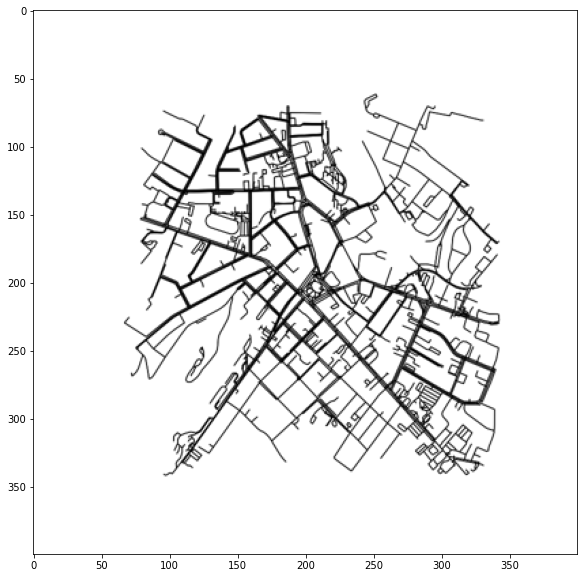

In [ ]:
#check a sample after normalization
fig1, ax1 = plt.subplots(figsize=(10,10) )
plt.imshow(train_tensors[444,:,:,0],cmap='gray')

**Parameters and Hyperparameters**

In [ ]:
TENSOR_H=train_tensors.shape[1]
TENSOR_W=train_tensors.shape[2]
TENSOR_C=train_tensors.shape[3]

BATCH_SIZE=20    #increase it when increasing the dataset 
BUFFER_SIZE=100  #increase it when increasing the dataset 
latent_dim=100

save_every=139    #increase it when increasing the dataset 

**Batch and shuffle data**

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_tensors).shuffle(BUFFER_SIZE).batch(BATCH_SIZE) 

**Build the Generator**

***You can improve the architecture if the model, depnding on the image size, and avilable resources***

In [ ]:
kernel_initializer=tf.initializers.RandomNormal(mean=0.0 , stddev=0.02)

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(int(TENSOR_H/8)*int(TENSOR_W/8)*256, use_bias=False, input_shape=(latent_dim,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((int(TENSOR_H/8), int(TENSOR_W/8), 256)))
    assert model.output_shape == (None, int(TENSOR_H/8), int(TENSOR_W/8), 256)  # Note: None is the batch size


    model.add(layers.Conv2DTranspose(256, (3,3), strides=(1, 1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/8),int(TENSOR_W/8), 256)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(128, (3,3), strides=(1, 1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/8),int(TENSOR_W/8), 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    #kernel_initializer=w_init

    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/4), int(TENSOR_W/4), 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(1,1), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/4), int(TENSOR_W/4), 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())


    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', use_bias=False ))
    assert model.output_shape == (None, int(TENSOR_H/2), int(TENSOR_W/2), 32)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), padding='same'))
    assert model.output_shape == (None, TENSOR_H, TENSOR_W, 16)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    #convolution
    model.add(layers.Conv2D(TENSOR_C, (3,3), padding='same', strides=(1,1) , use_bias=False, activation='sigmoid' ))
    assert model.output_shape == (None, TENSOR_H,TENSOR_W, TENSOR_C)


    return model

**Test- not trained yet**

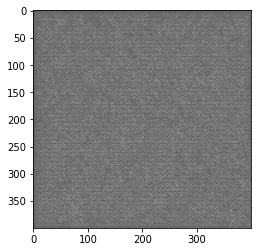

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0,:,:,0] ,cmap='gray')


In [ ]:
generated_image[0,:,:,0].dtype

tf.float32

**Build the Discriminator**

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',input_shape=[TENSOR_H, TENSOR_W, TENSOR_C]))

    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1,activation="sigmoid"))

    return model

**Test - not trained yet**

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.5092254]], shape=(1, 1), dtype=float32)


**Define the loss and optimizer**

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=False)

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(0.00005,beta_1=.5)
discriminator_optimizer = tf.keras.optimizers.Adam(0.00005,beta_1=.5)

**Save checkpoints**

In [ ]:
checkpoint_dir = r'D:\graph_generator\training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [ ]:
checkpoint_dir = '/content/training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

**Define the training loop**

In [ ]:
EPOCHS = 1
noise_dim = latent_dim
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,epoch + 1,seed)

    # Save the model every number of epochs
    if (epoch + 1) % save_every == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,epochs,seed)

**Generate and save images**

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0]  , cmap='gray')
      plt.axis('off')

  #plt.savefig(r'D:\graph_generator\generators\urban\image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

**Train the model**

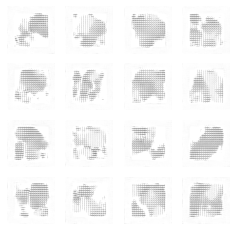

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
generator.save("generator_model1.h5")

**Load the model**

In [ ]:
graph_generator = tf.keras.models.load_model("generator_model1.h5")

(-0.5, 399.5, 399.5, -0.5)

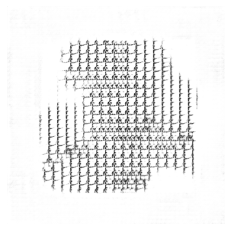

In [ ]:
gen=graph_generator( tf.random.normal([1, 100]),training=False)
fig = plt.figure(figsize=(4, 4))

plt.imshow(gen[0, :, :, 0] , cmap='gray')
plt.axis('off')

In [ ]:
discriminator(gen)

#**Image to graph**

In [ ]:
!pip install sknw
!pip install -U scikit-image
!pip install osmnx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sknw: filename=sknw-0.14-py3-none-any.whl size=3383 sha256=d9da52a94968ee031d2b7f76ba8e776bd869100cffbd2b60d46da3f953b746a3
  Stored in directory: /root/.cache/pip/wheels/ca/bf/7b/5029002abec61d97b957427f4fd20426707486d99542feb85d
Successfully built sknw
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.5 MB 4.3 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
Looking in in

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.5 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.2
    Uninstalling matplotlib-3.5.2:
      Successfully uninstalled matplotlib-3.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from PIL import Image
from numpy import asarray
from skimage.morphology import skeletonize
from skimage import data
import sknw
import numpy as np
import networkx as nx
%matplotlib inline 
import matplotlib.pyplot as plt
import osmnx as ox

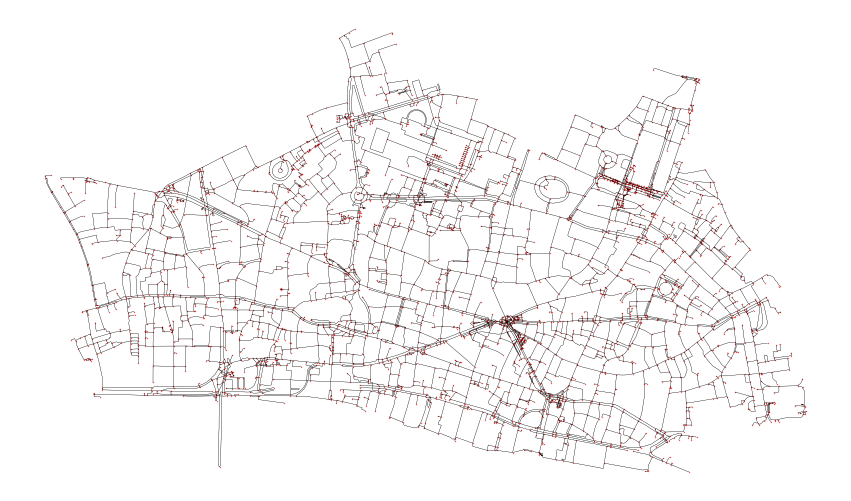

In [ ]:
place_name="City of London, England, United Kingdom"
G = ox.graph_from_place(place_name, network_type='walk', simplify=True)
nodess, edgess = ox.graph_to_gdfs(G)
fig, ax = plt.subplots(figsize=(15,15))
edgess.plot(ax=ax, linewidth=0.2, edgecolor='black')
nodess.plot(ax=ax, color='red', markersize=.1)
plt.axis('off')
plt.savefig('london.png' )

plt.show()

<class 'numpy.ndarray'>
(1080, 1080, 4)
(1080, 1080)
(1080, 1080, 1)
<class 'networkx.classes.graph.Graph'>


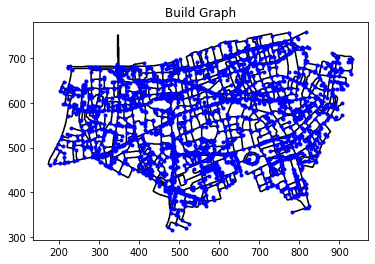

In [ ]:
# load the image and convert into
# numpy array
img = Image.open('london.png')
  
# asarray() class is used to convert
# PIL images into NumPy arrays
numpydata = asarray(img)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)

numpydata=numpydata[:,:,0]
print(numpydata.shape)
numpydata=np.reshape(numpydata,newshape=(numpydata.shape[0],numpydata.shape[1],1))
print(numpydata.shape)
skee3=skeletonize(~numpydata).astype(np.uint16)


# build graph from skeleton
graph = sknw.build_sknw(skee3)
print(type(graph))


# draw image
#plt.imshow(img, cmap='gray')

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'black')
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'b.')

# title and show
plt.title('Build Graph')
plt.show()